# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [1]:
##importing all the libraries that are needed for the computation 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as matplotlib
import matplotlib.pyplot as plt
#import os
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
%cd '/content/gdrive/My Drive/Colab Notebooks/ieee-fraud-detection'
!ls

/content/gdrive/My Drive/Colab Notebooks/ieee-fraud-detection
'CSE519 HW2 Template.ipynb'		     test_identity.csv
 sample_submission.csv			     test_transaction.csv
'Screen Shot 2019-09-26 at 6.47.39 AM.png'   train_identity.csv
 snscounter.pdf				     train_transaction.csv


In [0]:
#to access the csv files, we have to traverse to the correct directory

#os.chdir('/Users/debapriyamukherjee/Documents/DSF/ieee-fraud-detection/')

In [4]:
#reading the train_transaction dataset into the dataframe
train_transaction_dataset = pd.read_csv('train_transaction.csv')
# print(train_transaction_dataset["isFraud"].values.tolist())
train_transaction_dataset.shape

(590540, 394)

In [5]:
#reading the train_identity dataset into the dataframe
train_identity_dataset = pd.read_csv('train_identity.csv')
# train_identity_dataset = train_identity_dataset.fillna(0)
# mob = train_identity_dataset["DeviceType"]]
# print(mob.count())
train_identity_dataset.shape

(144233, 41)

In [6]:
#to print the dataset
print(train_identity_dataset)

        TransactionID  id_01  ...  DeviceType                          DeviceInfo
0             2987004    0.0  ...      mobile       SAMSUNG SM-G892A Build/NRD90M
1             2987008   -5.0  ...      mobile                          iOS Device
2             2987010   -5.0  ...     desktop                             Windows
3             2987011   -5.0  ...     desktop                                 NaN
4             2987016    0.0  ...     desktop                               MacOS
5             2987017   -5.0  ...     desktop                             Windows
6             2987022  -15.0  ...         NaN                                 NaN
7             2987038    0.0  ...      mobile                                 NaN
8             2987040  -10.0  ...     desktop                             Windows
9             2987048   -5.0  ...     desktop                             Windows
10            2987049   -5.0  ...     desktop                             Windows
11            29

In [7]:
#This problem requires the left-join of the two datasets as we need data from both the tables. 
#Left-join because we need all the information related to the datasets.
#Otherwise we will miss out much information about the datasets.

dataset = pd.merge(train_transaction_dataset,train_identity_dataset, on="TransactionID" , how = "left")
# dataset.dtypes

#to see the number of rows and columns of the dataset
dataset.shape

(590540, 434)

This problem requires the left-join of the two datasets as we need data from both the tables. 
Left-join because we need all the information related to the datasets.
Otherwise we will miss out much information about the datasets.

In [8]:
#we only require a few columns from the merged dataset, hence removing the unnecessary columns
feature_dataset = dataset[['TransactionID', 'DeviceType', 'DeviceInfo', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'addr1', 'addr2', 'dist1', 'dist2']]
feature_dataset.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,addr1,addr2,dist1,dist2
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,524834.000000,524834.000000,238269.000000,37627.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,290.733794,86.800630,118.502180,231.855423
std,1.704744e+05,0.183755,4.617224e+06,239.162522,101.741072,2.690623,371.872026,529.053494
min,2.987000e+06,0.000000,8.640000e+04,0.251000,100.000000,10.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,204.000000,87.000000,3.000000,7.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,299.000000,87.000000,8.000000,37.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,330.000000,87.000000,24.000000,206.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,540.000000,102.000000,10286.000000,11623.000000


In [9]:
print(feature_dataset)

        TransactionID DeviceType  ...   dist1   dist2
0             2987000        NaN  ...    19.0     NaN
1             2987001        NaN  ...     NaN     NaN
2             2987002        NaN  ...   287.0     NaN
3             2987003        NaN  ...     NaN     NaN
4             2987004     mobile  ...     NaN     NaN
5             2987005        NaN  ...    36.0     NaN
6             2987006        NaN  ...     0.0     NaN
7             2987007        NaN  ...     NaN     NaN
8             2987008     mobile  ...     NaN     NaN
9             2987009        NaN  ...    19.0     NaN
10            2987010    desktop  ...     NaN     NaN
11            2987011    desktop  ...     NaN    30.0
12            2987012        NaN  ...     NaN     NaN
13            2987013        NaN  ...     NaN     NaN
14            2987014        NaN  ...     NaN     NaN
15            2987015        NaN  ...     3.0     NaN
16            2987016    desktop  ...     NaN     NaN
17            2987017    des

In [10]:
feature_dataset.head(2)

,TransactionID,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2
0,2987000,NaN,NaN,0,86400,68.5,W,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN
1,2987001,NaN,NaN,0,86401,29.0,W,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN


In [0]:
#creating two datasets with the fraudulent and non-fraudulent transactions individually
fraud_dataset = feature_dataset[feature_dataset['isFraud']==1]
nonfraud_dataset =  feature_dataset[feature_dataset['isFraud']==0]

In [12]:
fraud_dataset.shape

(20663, 15)

In [13]:
nonfraud_dataset.shape

(569877, 15)

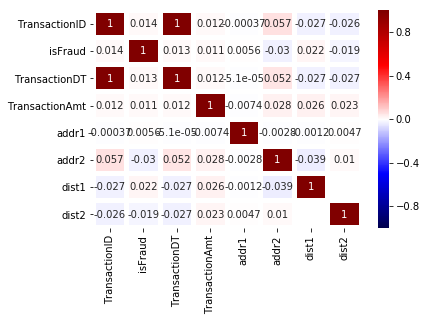

In [14]:
sns.heatmap(feature_dataset.corr(), vmin=-1, vmax=1, cmap='seismic', linewidths=4, annot=True);

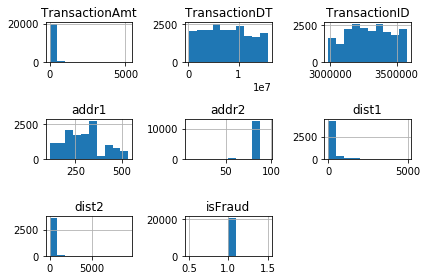

In [15]:
##Visualizing the distribution of each field in the combined dataframe for fraudulent transactions 

hists = fraud_dataset.hist()
plt.tight_layout()

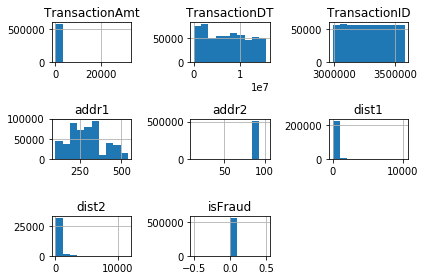

In [16]:
##Visualizing the distribution of each field in the combined dataframe for non-fraudulent transactions 

hists = nonfraud_dataset.hist()
plt.tight_layout()

Text(0, 0.5, 'Fraudulent Transactions')

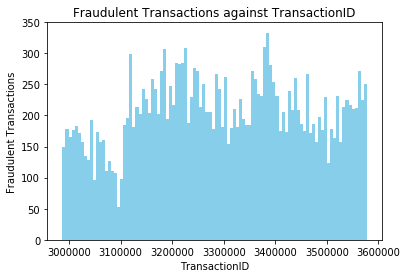

In [17]:
##TransactionID for Fraudulent Transactions

# create figure and axis
fig, ax = plt.subplots()
#fig.set_size_inches(10, 5)
# plotting the histogram
ax.hist(fraud_dataset['TransactionID'], bins = 100 , color = "skyblue") 
# setting the title and labels
ax.set_title('Fraudulent Transactions against TransactionID')
ax.set_xlabel('TransactionID')
ax.set_ylabel('Fraudulent Transactions')

Text(0, 0.5, 'Non-Fraudulent Transactions')

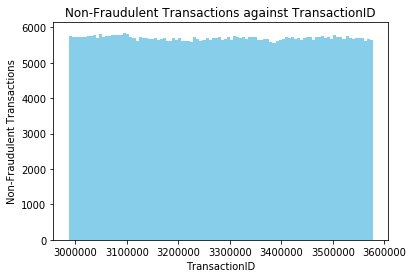

In [18]:
##TransactionID for Non-fraudulent Transactions

# create figure and axis
fig, ax = plt.subplots()
#fig.set_size_inches(10, 5)
# plotting the histogram
ax.hist(nonfraud_dataset['TransactionID'], bins = 100 , color = "skyblue") 
# setting the title and labels
ax.set_title('Non-Fraudulent Transactions against TransactionID')
ax.set_xlabel('TransactionID')
ax.set_ylabel('Non-Fraudulent Transactions')

Plotting transactionID against fraudulent or non-fraudulent transactions does not really infer any useful information about the probabilty of fraudulent transactions, as can be confirmed from the both the plots above. It does not imply any meaning which would be useful in the prediction later on.

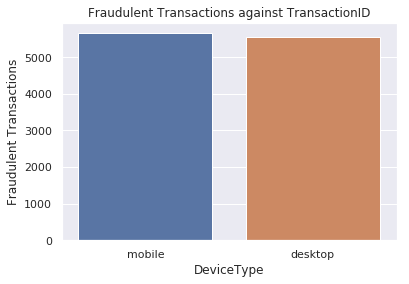

In [19]:
##DeviceType for Fraudulent Transactions

sns.set(style="darkgrid")
ax = sns.countplot(x="DeviceType", data=fraud_dataset)
ax.set(xlabel='DeviceType', ylabel= 'Fraudulent Transactions', 
       title = 'Fraudulent Transactions against TransactionID')
plt.show()

The above plot reveals that the fraudulent transactions occur at almost the same rate in mobile as well as in desktop. 

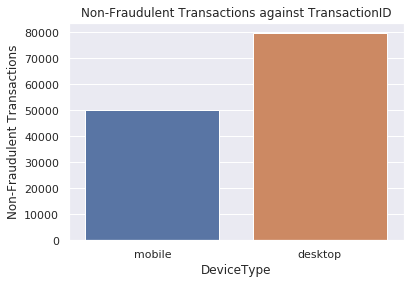

In [20]:
##DeviceType for Non-Fraudulent Transactions

sns.set(style="darkgrid")
ax = sns.countplot(x="DeviceType", data=nonfraud_dataset)
ax.set(xlabel='DeviceType', ylabel= 'Non-Fraudulent Transactions', 
       title = 'Non-Fraudulent Transactions against TransactionID')
plt.show()

For non-fraudulent transactions, it is reavealed from the above plot, that if a transaction happens from a desktop rather than a mobile, the number of non-fraudulent transactions are higher than that in mobiles.

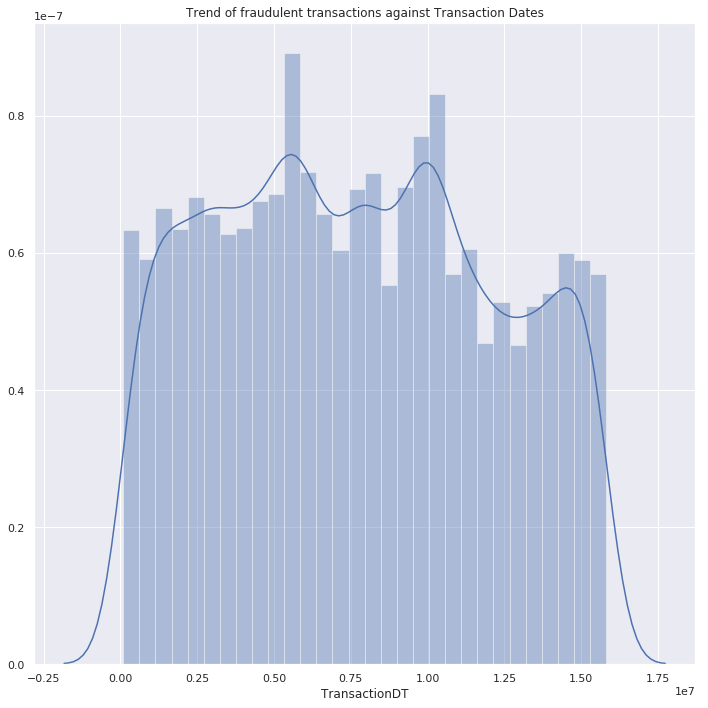

In [21]:
##TransactionDT for Fraudulent Transactions

plt.figure(figsize=(10,10))
ax = sns.distplot(fraud_dataset['TransactionDT']);
plt.title('Trend of fraudulent transactions against Transaction Dates')
plt.tight_layout()


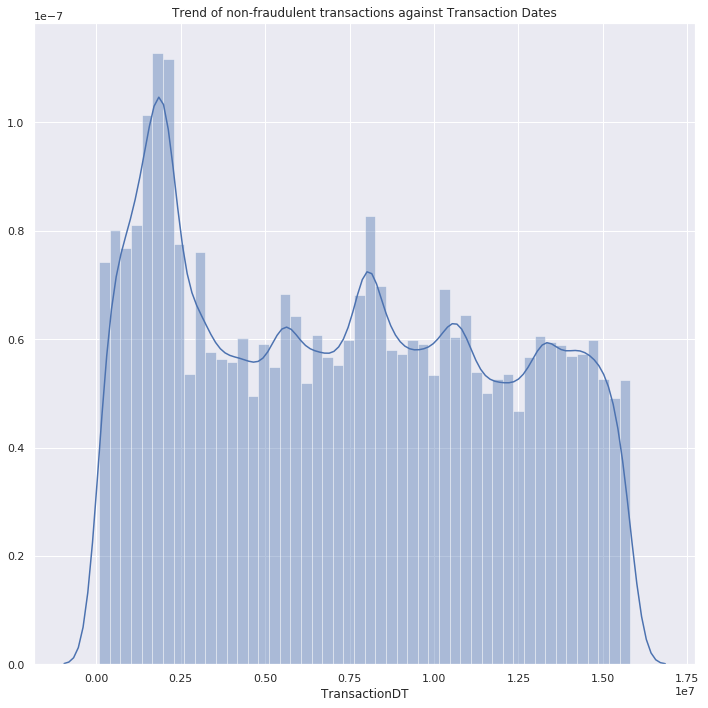

In [22]:
##TransactionDT for Non-Fraudulent Transactions

plt.figure(figsize=(10,10))
ax = sns.distplot(nonfraud_dataset['TransactionDT']);
plt.title('Trend of non-fraudulent transactions against Transaction Dates')
plt.tight_layout()

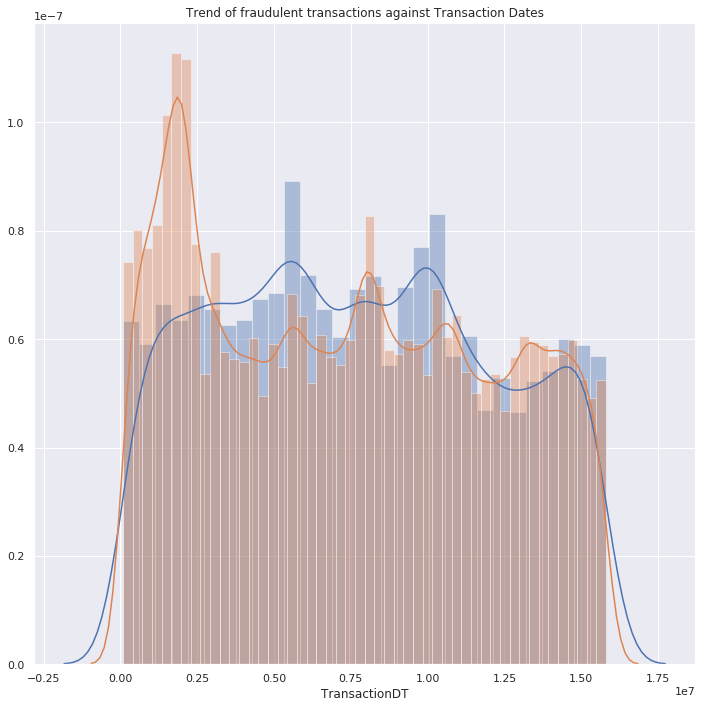

In [23]:
##TransactionDT for Fraudulent Transactions and Non-fraudulent Transactions

plt.figure(figsize=(10,10))
ax = sns.distplot(fraud_dataset['TransactionDT']);
ax1 = sns.distplot(nonfraud_dataset['TransactionDT']);
plt.title('Trend of fraudulent transactions against Transaction Dates')
plt.tight_layout()

In the above three plots, we see the variation of fraudulent and non-fraudulent transactions with the transaction date. The variation in both can be clearly seen, and thus can be used as a parameter in training a model for predicting the probability of fraudulent transactions.

Text(0, 0.5, 'Fraudulent Transactions')

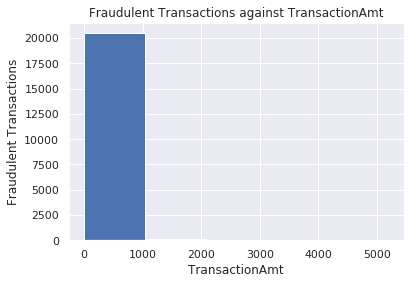

In [24]:
##TransactionAmt for Fraudulent transactions

fig, ax = plt.subplots()
# plotting the histogram
ax.hist(fraud_dataset['TransactionAmt'], bins = 5)
# setting the title and labels
ax.set_title('Fraudulent Transactions against TransactionAmt')
ax.set_xlabel('TransactionAmt')
ax.set_ylabel('Fraudulent Transactions')

Plotting Fraudulent Transactions (isFraud=1) against Transaction Amount reveals that the probability of fraudulent transactions are higher in the range below 1000 units of transaction amount.

Text(0, 0.5, 'Non-Fraudulent Transactions')

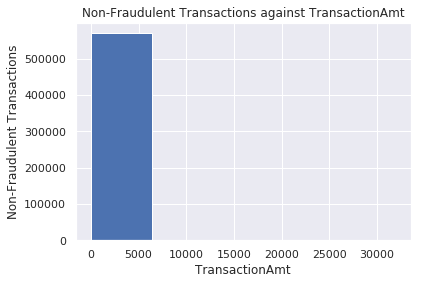

In [25]:
##TransactionAmt for Non-fraudulent transactions

fig, ax = plt.subplots()
#fig.set_size_inches(10, 5)
# plotting the histogram
ax.hist(nonfraud_dataset['TransactionAmt'], bins = 5)
# setting the title and labels
ax.set_title('Non-Fraudulent Transactions against TransactionAmt')
ax.set_xlabel('TransactionAmt')
ax.set_ylabel('Non-Fraudulent Transactions')

Plotting Non-Fraudulent Transactions (isFraud = 0) against Transaction Amount reveals that the probability of fraudulent transactions are higher in the higher units of transaction amount than that of the fraudulent transactions.

<function matplotlib.pyplot.show>

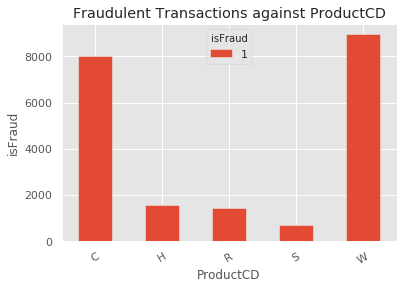

In [26]:
##ProductCD for Fraudulent Transactions

plt.style.use('ggplot')
chart = fraud_dataset.groupby(['ProductCD', 'isFraud'])\
      .ProductCD.count().unstack().plot.bar(legend=True)
plt.xlabel('ProductCD', horizontalalignment='center')
plt.ylabel('isFraud')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
plt.title('Fraudulent Transactions against ProductCD')
plt.show

Plotting Fraudulent Transactions against Product Codes (C,H,R,S,W) reveals that the probability of fraudulent transactions is the maximum for the product code W, with fraudulent transactions being above 9000. The product code which comes next to W is C which has 8000 fraudulent transactions approximately. All the other product codes have lesser number of fraudulent transactions as compared to W and C.

<function matplotlib.pyplot.show>

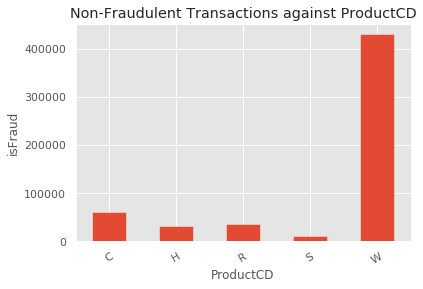

In [27]:
##ProductCD for Non-Fraudulent Transactions

plt.style.use('ggplot')
chart = nonfraud_dataset.groupby(['ProductCD', 'isFraud'])\
      .ProductCD.count().unstack().plot.bar(legend=False)
plt.xlabel('ProductCD', horizontalalignment='center')
plt.ylabel('isFraud')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
plt.title('Non-Fraudulent Transactions against ProductCD')
plt.show


Plotting Non-Fraudulent Transactions against Product Codes (C,H,R,S,W) reveals that the probability of non-fraudulent transactions is the maximum for the product code W, with non-fraudulent transactions being above 400000. The product code which comes next to W is C which has only 50000 non-fraudulent transactions approximately. All the other product codes have lesser number of fraudulent transactions as compared to W and C.

<function matplotlib.pyplot.show>

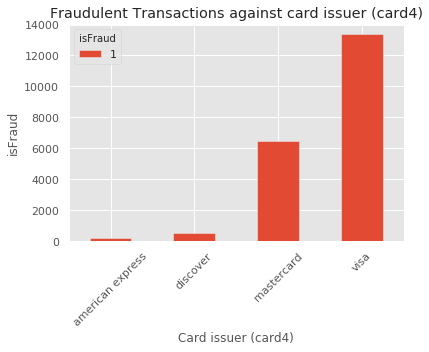

In [28]:
##card issuer (card4) For Fraudulent Transactions

plt.style.use('ggplot')
chart = fraud_dataset.groupby(['card4', 'isFraud'])\
      .card4.count().unstack().plot.bar(legend=True)
plt.xlabel('Card issuer (card4)', horizontalalignment='center')
plt.ylabel('isFraud')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Fraudulent Transactions against card issuer (card4)')
plt.show

Plotting Fraudulent Transactions against the Card Issuers (american express, discover, mastercard, visa) reveals that the probability of fraudulent transactions is the maximum for the card issue 'visa', with fraudulent transactions being above 13000 approximately. The card issuer which comes next to 'visa' is 'mastercard' which has above 6000 fraudulent transactions approximately. All the other card issuers have lesser number of fraudulent transactions as compared to visa and mastercard.

<function matplotlib.pyplot.show>

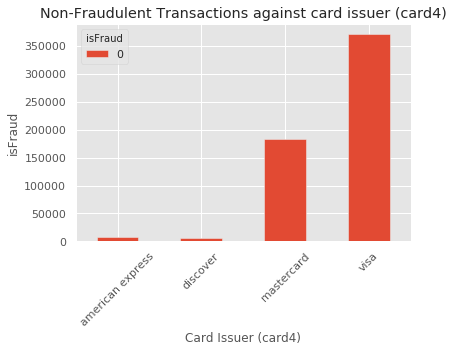

In [29]:
##card issuer (card4) for Non-fraudulent Transactions

plt.style.use('ggplot')
chart = nonfraud_dataset.groupby(['card4', 'isFraud'])\
      .card4.count().unstack().plot.bar(legend=True)
plt.xlabel('Card Issuer (card4)', horizontalalignment='center')
plt.ylabel('isFraud')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Non-Fraudulent Transactions against card issuer (card4)')
plt.show

Plotting Non-Fraudulent Transactions against the Card Issuers (american express, discover, mastercard, visa) reveals that the probability of non-fraudulent transactions is the maximum for the card issue 'visa', with fraudulent transactions being 350000 approximately. The card issuer which comes next to 'visa' is 'mastercard' which has above 175000 fraudulent transactions approximately. All the other card issuers have lesser number of fraudulent transactions as compared to visa and mastercard.

<function matplotlib.pyplot.show>

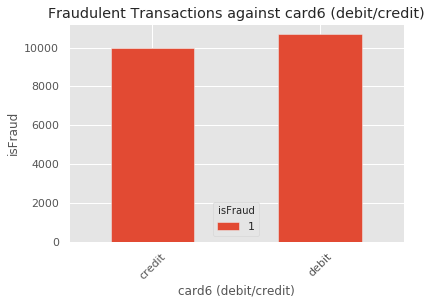

In [30]:
##card6 (debit/credit) for Fraudulent Transactions

plt.style.use('ggplot')
chart = fraud_dataset.groupby(['card6', 'isFraud'])\
      .card6.count().unstack().plot.bar(legend=True)
plt.xlabel('card6 (debit/credit)', horizontalalignment='center')
plt.ylabel('isFraud')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Fraudulent Transactions against card6 (debit/credit)')
plt.show

The above plot of fraudulent transactions against the parameter 'card6' shows that the amount of fraudulent transactions are slightly higher for the credit transactions when compared to debit transactions. 

<function matplotlib.pyplot.show>

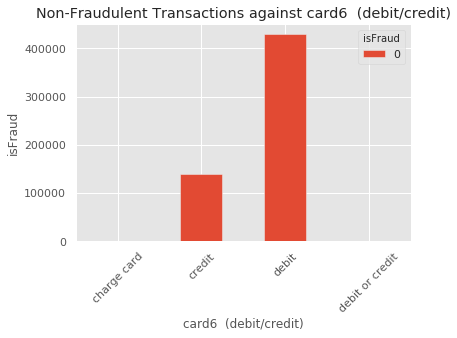

In [31]:
##card6 (debit/credit) for Non-Fraudulent Transactions

plt.style.use('ggplot')
chart = nonfraud_dataset.groupby(['card6', 'isFraud'])\
      .card6.count().unstack().plot.bar(legend=True)
plt.xlabel('card6  (debit/credit)', horizontalalignment='center')
plt.ylabel('isFraud')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Non-Fraudulent Transactions against card6  (debit/credit)')
plt.show

The above plot of non-fraudulent transactions against the parameter 'card6' shows that the amount of non-fraudulent transactions are definitely higher for the debit transactions when compared to credit transactions.

Text(0.5, 1.0, 'Trend of Transactions against card6 (debit/credit)')

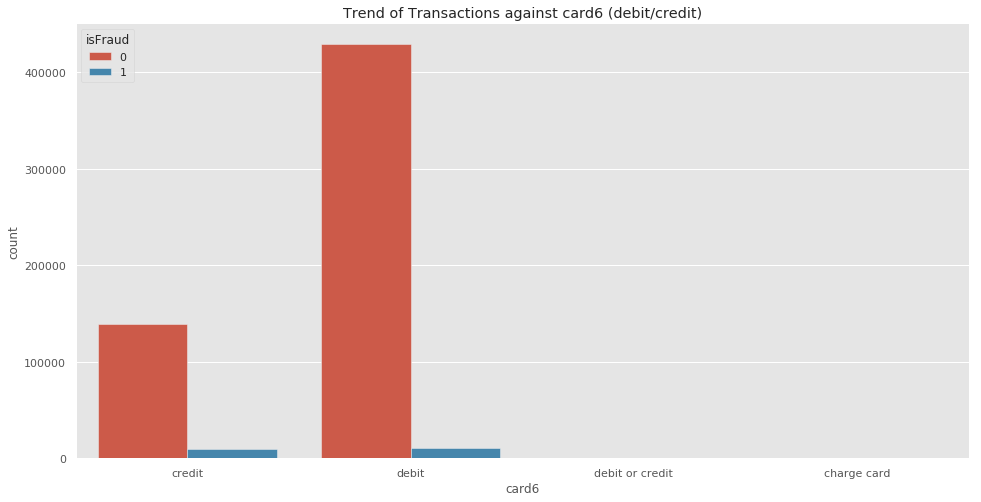

In [32]:
##card6 (debit/credit) for Fraudulent and Non-Fraudulent Transactions

plt.figure(figsize=(16,8))
ax = sns.countplot(x="card6", data=feature_dataset, hue = "isFraud");
plt.title('Trend of Transactions against card6 (debit/credit)')
#plt.tight_layout()

The above plot of fraudulent and non-fraudulent transactions against the parameter 'card6' shows that the amount of non-fraudulent transactions are definitely higher for the debit transactions when compared to credit transactions. 

Text(0.5, 1.0, 'Trend of fraudulent transactions against P_emaildomain')

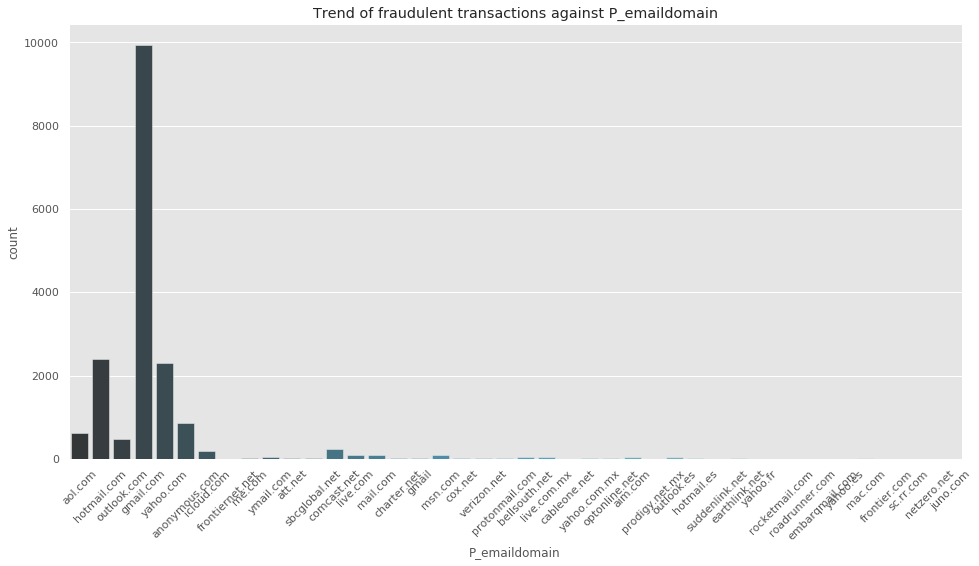

In [33]:
##P_emaildomain for Fraudulent Transactions


plt.figure(figsize=(25,8))
ax = sns.countplot(x="P_emaildomain", data=fraud_dataset, palette="GnBu_d");
x_col = "P_emaildomain (isFraud)"
y_col = "Fraudulent transactions"
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Trend of fraudulent transactions against P_emaildomain')
#plt.tight_layout()

When we plot the fraudulent transaction against P_emaildomain, we see that the maximum fraudulent transactions occur through gmail.com. The number of fraudulent transactions approximately reach 10000 units for gmail.com, whereas for hotmail.com, it reaches approximately 2500 units.

Text(0.5, 1.0, 'Trend of non-fraudulent transactions against P_emaildomain')

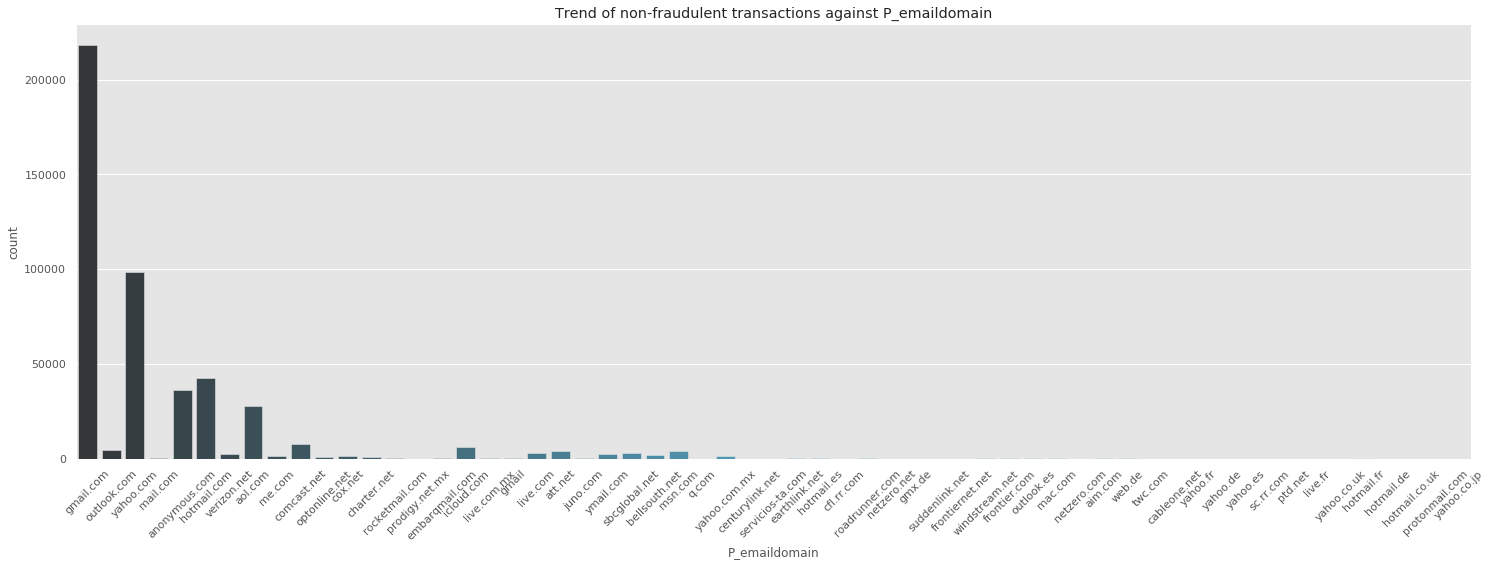

In [134]:
##P_emaildomain for Non-Fraudulent Transactions

plt.figure(figsize=(25,8))
ax = sns.countplot(x="P_emaildomain", data=nonfraud_dataset, palette="GnBu_d");
x_col = "P_emaildomain (isFraud)"
y_col = "Non-Fraudulent transactions"
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Trend of non-fraudulent transactions against P_emaildomain')
#plt.tight_layout()

When we plot the non-fraudulent transaction against P_emaildomain, we see that the maximum non-fraudulent transactions occur through gmail.com. The number of non-fraudulent transactions approximately reach 225000 units for gmail.com, whereas for yahoo.com, it reaches approximately 100000 units.

Text(0.5, 1.0, 'Trend of fraudulent transactions against R_emaildomain')

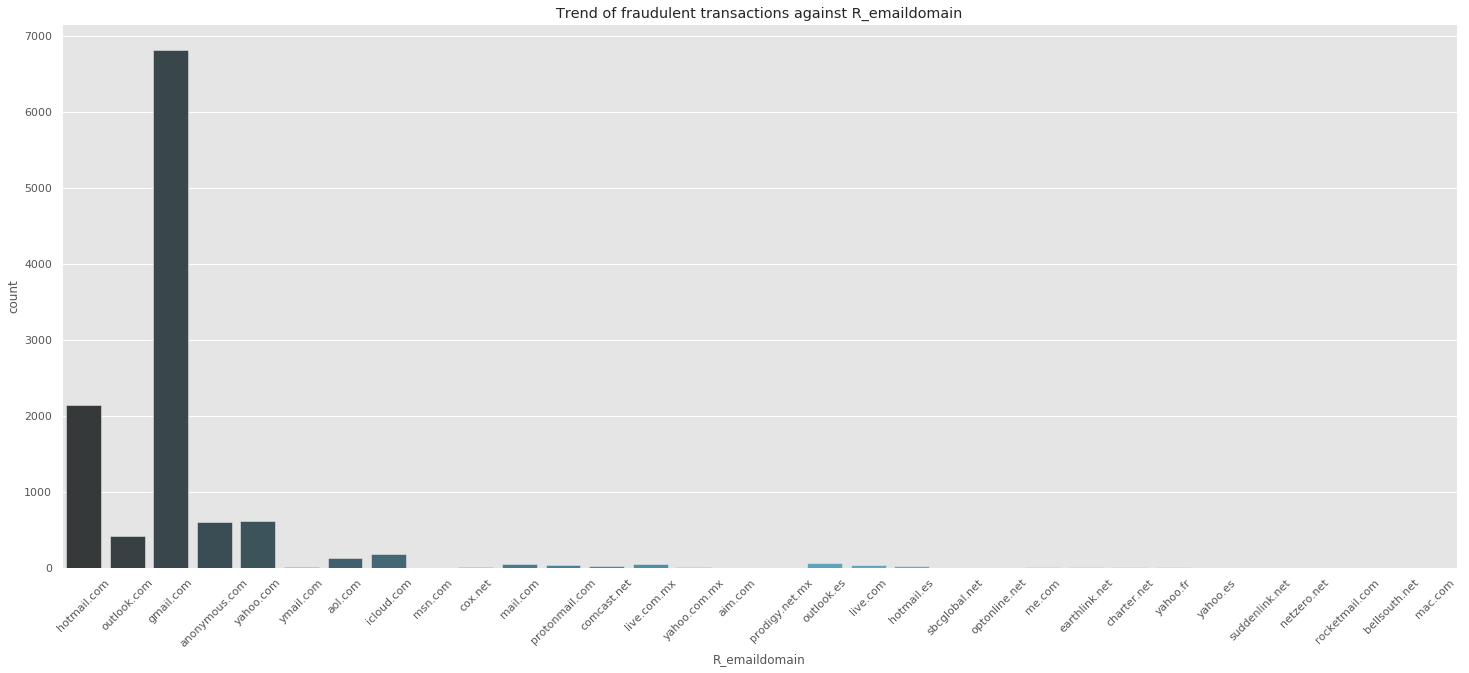

In [135]:
##R_emaildomain for Fraudulent Transactions

plt.figure(figsize=(25,10))
ax = sns.countplot(x="R_emaildomain", data=fraud_dataset, palette="GnBu_d");
x_col = "R_emaildomain (isFraud)"
y_col = "Fraudulent transactions"
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Trend of fraudulent transactions against R_emaildomain')
#plt.tight_layout()

When we plot the fraudulent transaction against R_emaildomain, we see that the maximum fraudulent transactions occur through gmail.com. The number of fraudulent transactions approximately reach 6800 units for gmail.com, whereas for hotmail.com, it reaches approximately 2100 units.

Text(0.5, 1.0, 'Trend of non-fraudulent transactions against R_emaildomain')

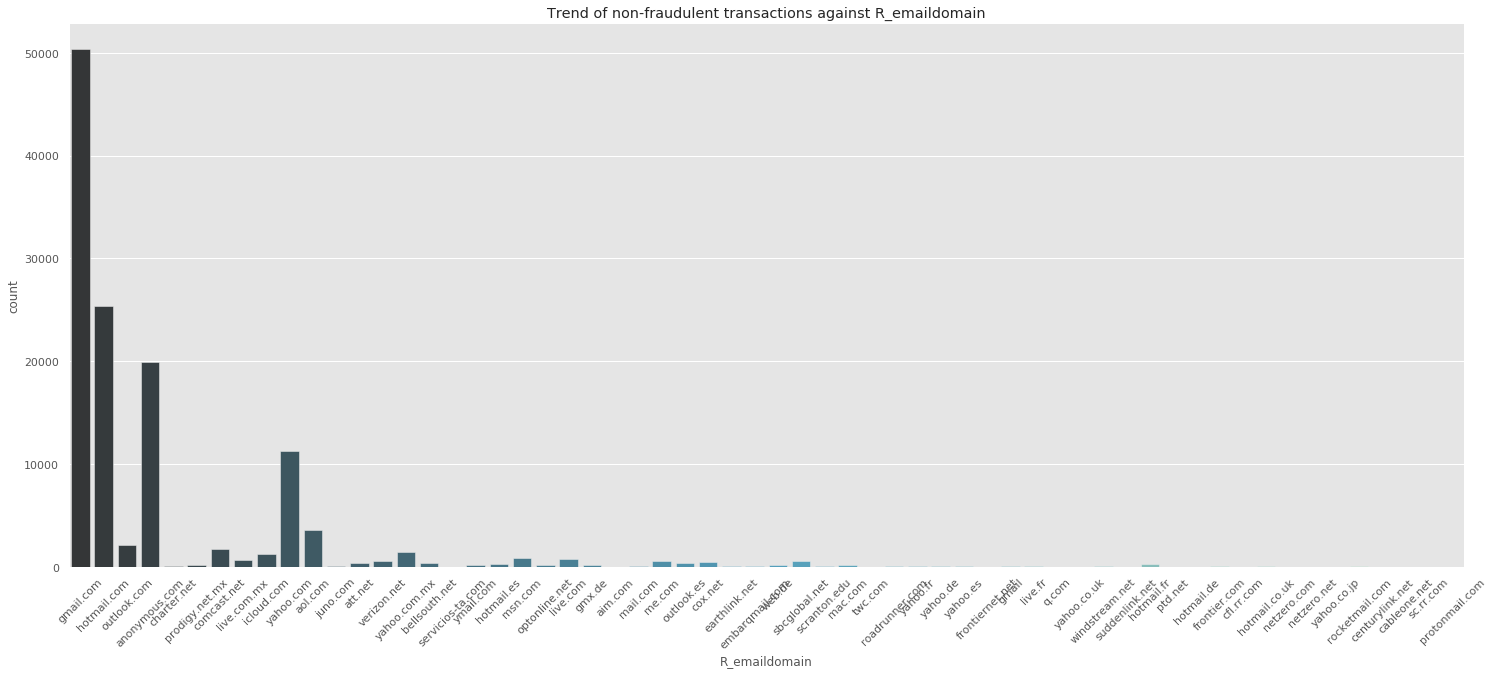

In [133]:
##R_emaildomain for Non-fraudulent Transactions

plt.figure(figsize=(25,10))
ax = sns.countplot(x="R_emaildomain", data=nonfraud_dataset, palette="GnBu_d");
x_col = "R_emaildomain (isFraud)"
y_col = "Non-Fraudulent transactions"
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Trend of non-fraudulent transactions against R_emaildomain')
#plt.tight_layout()

When we plot the non-fraudulent transaction against R_emaildomain, we see that the maximum fraudulent transactions occur through gmail.com. The number of fraudulent transactions approximately reach 50000 units for gmail.com, whereas for hotmail.com, it reaches approximately 25000 units.

Text(0.5, 1.0, 'Trend of fraudulent transactions against billing region (addr1)')

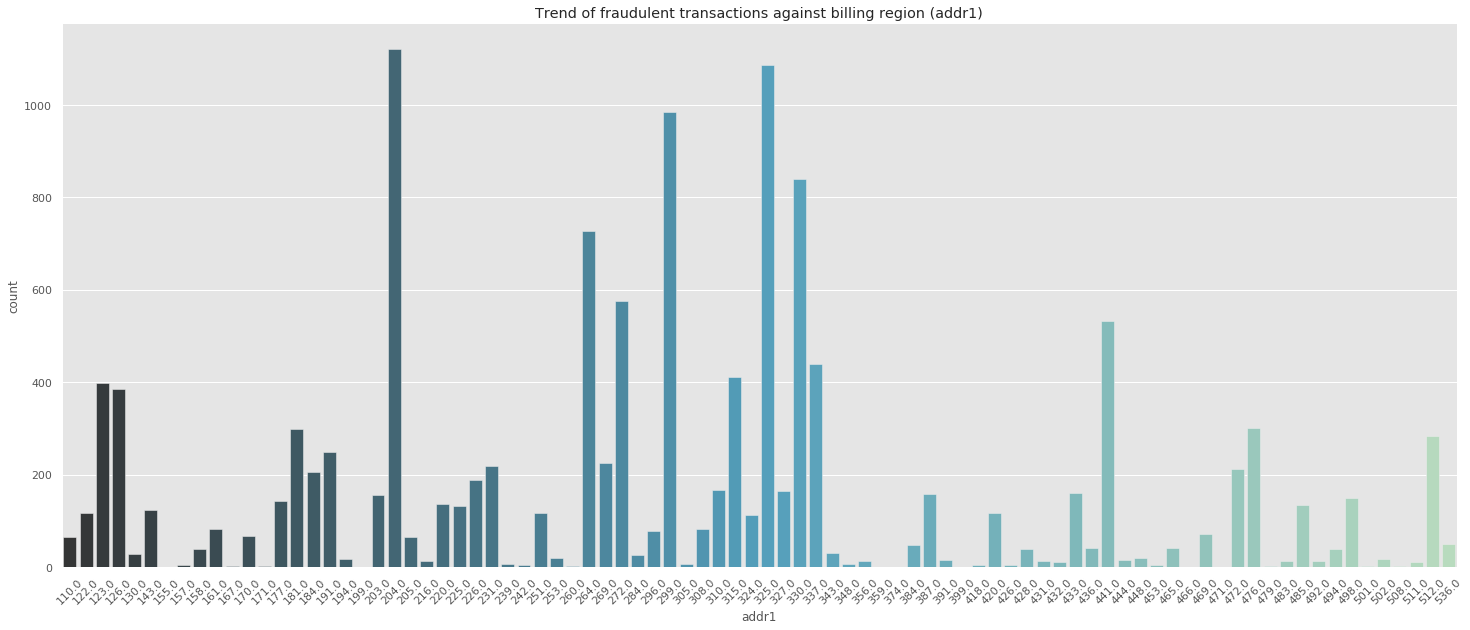

In [37]:
##Billing Region (addr1)  for Fraudulent Transactions

plt.figure(figsize=(25,10))
ax = sns.countplot(x="addr1", data=fraud_dataset, palette="GnBu_d");
x_col = "Billing region (addr1)"
y_col = "Fraudulent transactions"
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Trend of fraudulent transactions against billing region (addr1)')
#plt.tight_layout()

As we can see from the above plot, the number of fraudulent transactions vary over a wide range of billing region. It reaches a maximum for 204.0. But there are close enough fraudulent transactions over the entire range of billing region.

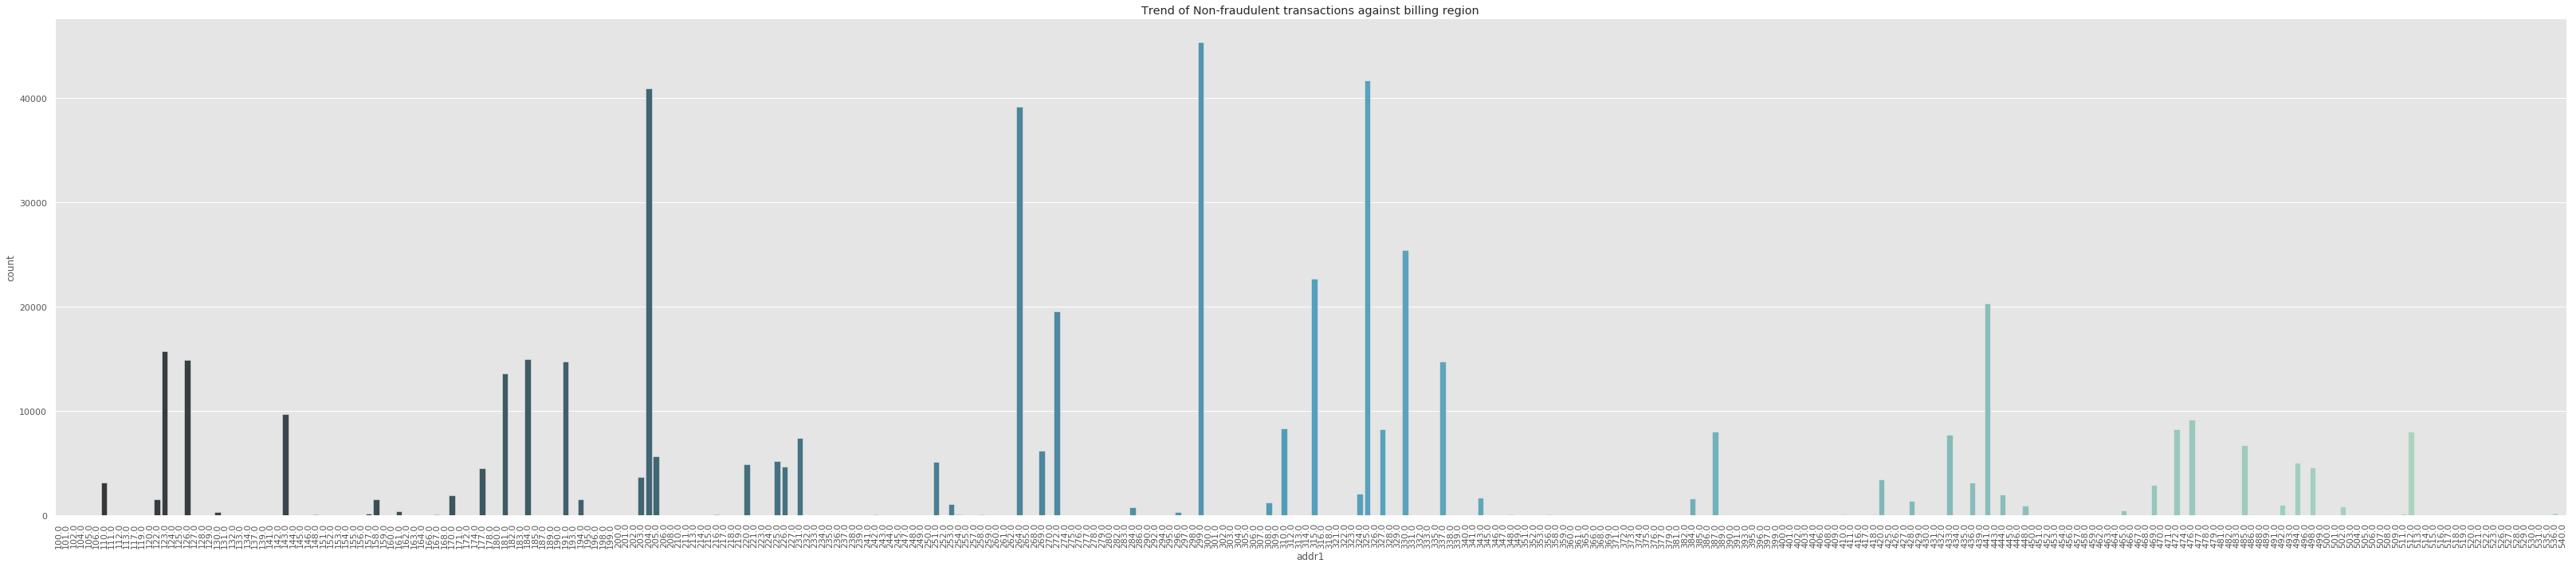

In [38]:
##Billing Region (addr1) for Non-Fraudulent Transactions

plt.figure(figsize=(45,10))
ax = sns.countplot(x="addr1", data=nonfraud_dataset, palette="GnBu_d");
x_col = "Billing region (addr1)"
y_col = "Non-Fraudulent transactions"
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Trend of Non-fraudulent transactions against billing region')
plt.tight_layout()

From the above graph, we can just infer that the non-fraudulent transactions are higher in the middle range of the values of the billing regions and they decrease in the extreme points.

Text(0.5, 1.0, 'Trend of fraudulent transactions against billing region')

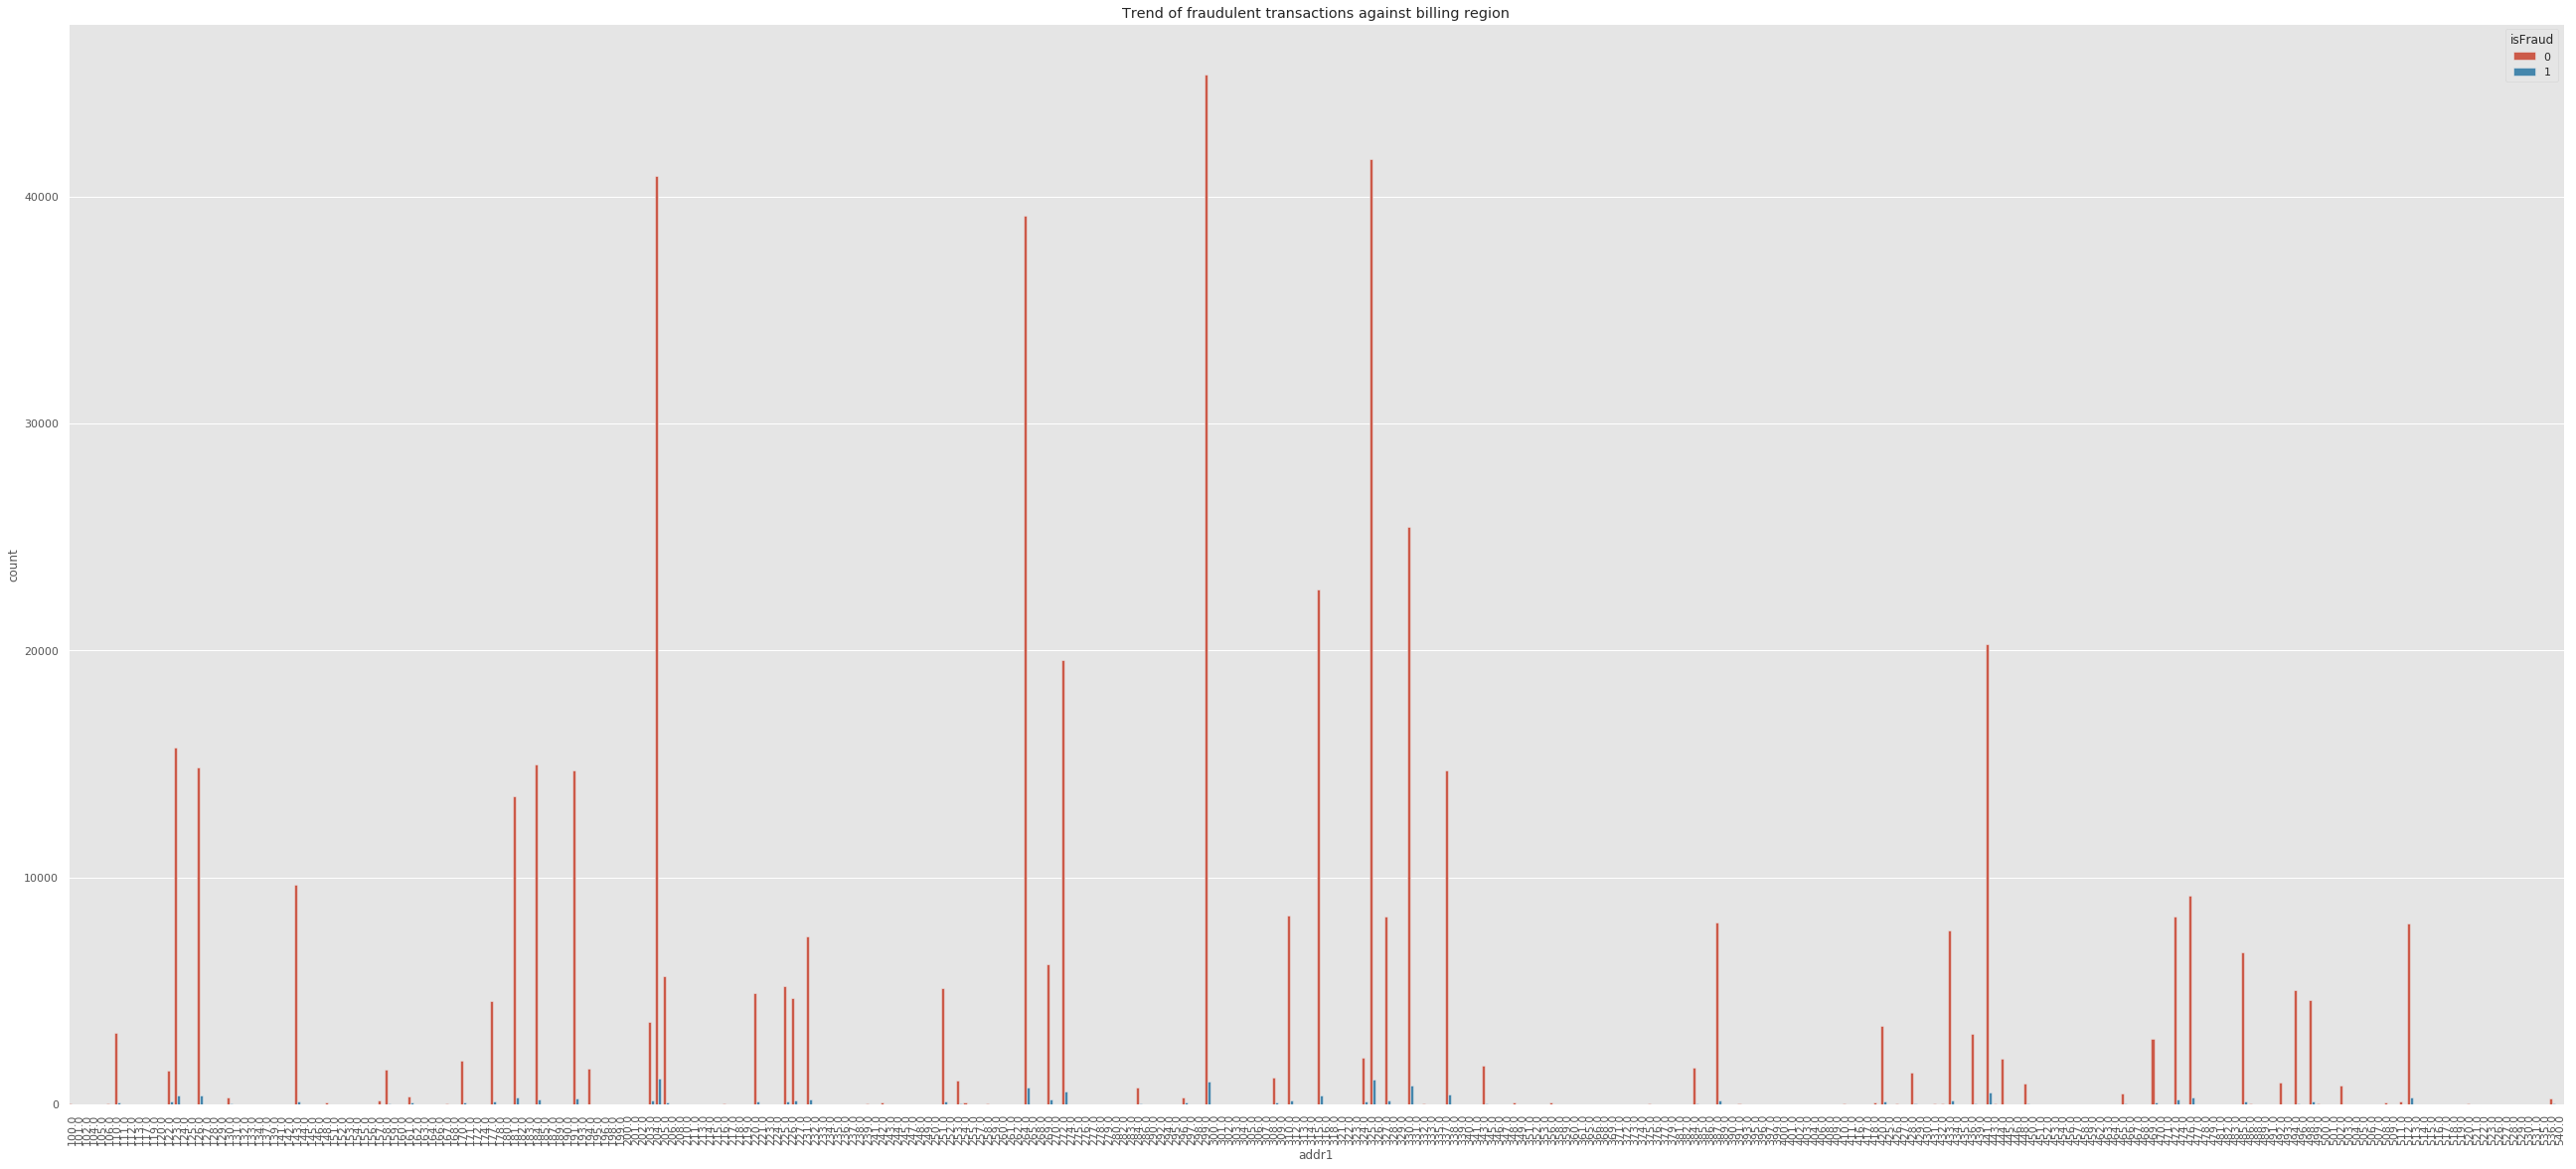

In [39]:
##Billing Region (addr1) - For both Fraudulent and Non-Fraudulent Transactions


plt.figure(figsize=(45,20))
ax = sns.countplot(x="addr1", data=feature_dataset, hue = "isFraud");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Trend of fraudulent transactions against billing region')
#plt.tight_layout()
#hue="who"

Here, in the above graph, we can see that both the fraudulent and non-fraudulent transactions are higher in the middle range of the values of the billing regions and they decrease in the extreme points.

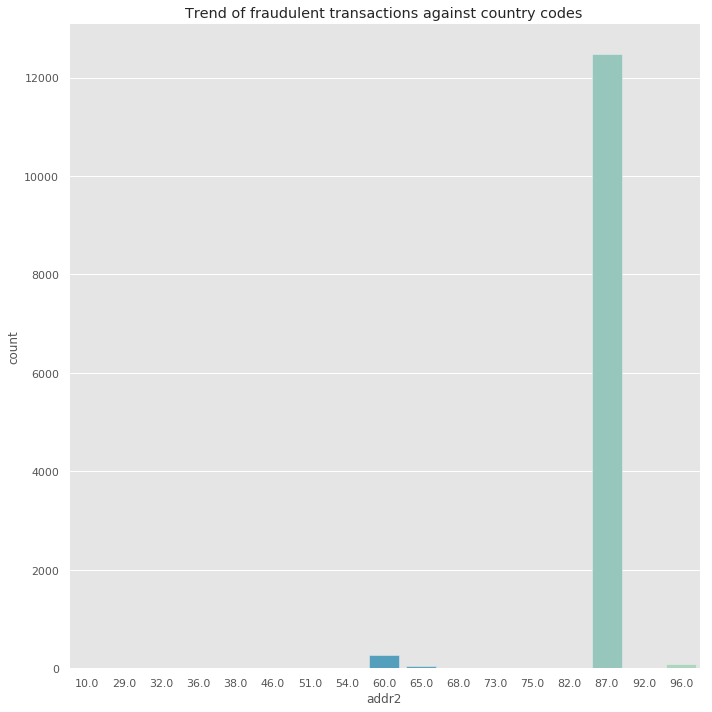

In [40]:
##Country Codes (addr2) For Fraudulent Transactions

#ax = plt.subplots()
plt.figure(figsize=(10,10))
ax = sns.countplot(x="addr2", data=fraud_dataset, palette="GnBu_d");
plt.title('Trend of fraudulent transactions against country codes')
plt.tight_layout()

This above plot is really interesting as we can clearly see that the maximum amount of fraudulent transactions occur at the country code = 87.0, the amount being above 12000 fraud transactions. So, this data is helpful in predicting the fraudulent transactions as we know the maximum probability of fraud transactions for a particular country code.

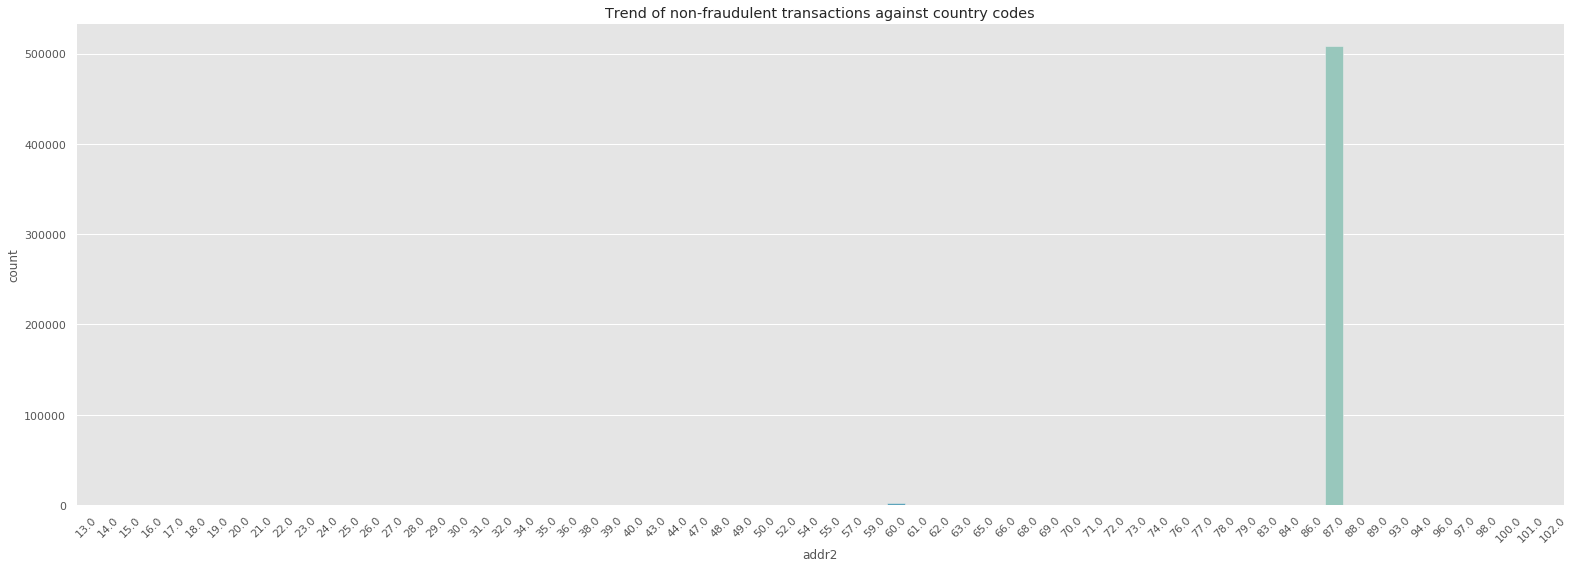

In [41]:
##Country Codes (addr2) For Non-Fraudulent Transactions

#ax = plt.subplots()
plt.figure(figsize=(22,8))
ax = sns.countplot(x="addr2", data=nonfraud_dataset, palette="GnBu_d");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Trend of non-fraudulent transactions against country codes')
plt.tight_layout()

The above plot for the variation of non-fraudulent transactions with country codes also reveal that the maximum number of non-fraudulent transactions occur at the country code = 87.0.

So we can easily train our data to these particular important country codes (87.0 and 60.0) as other countries codes have almost no transactions going on.

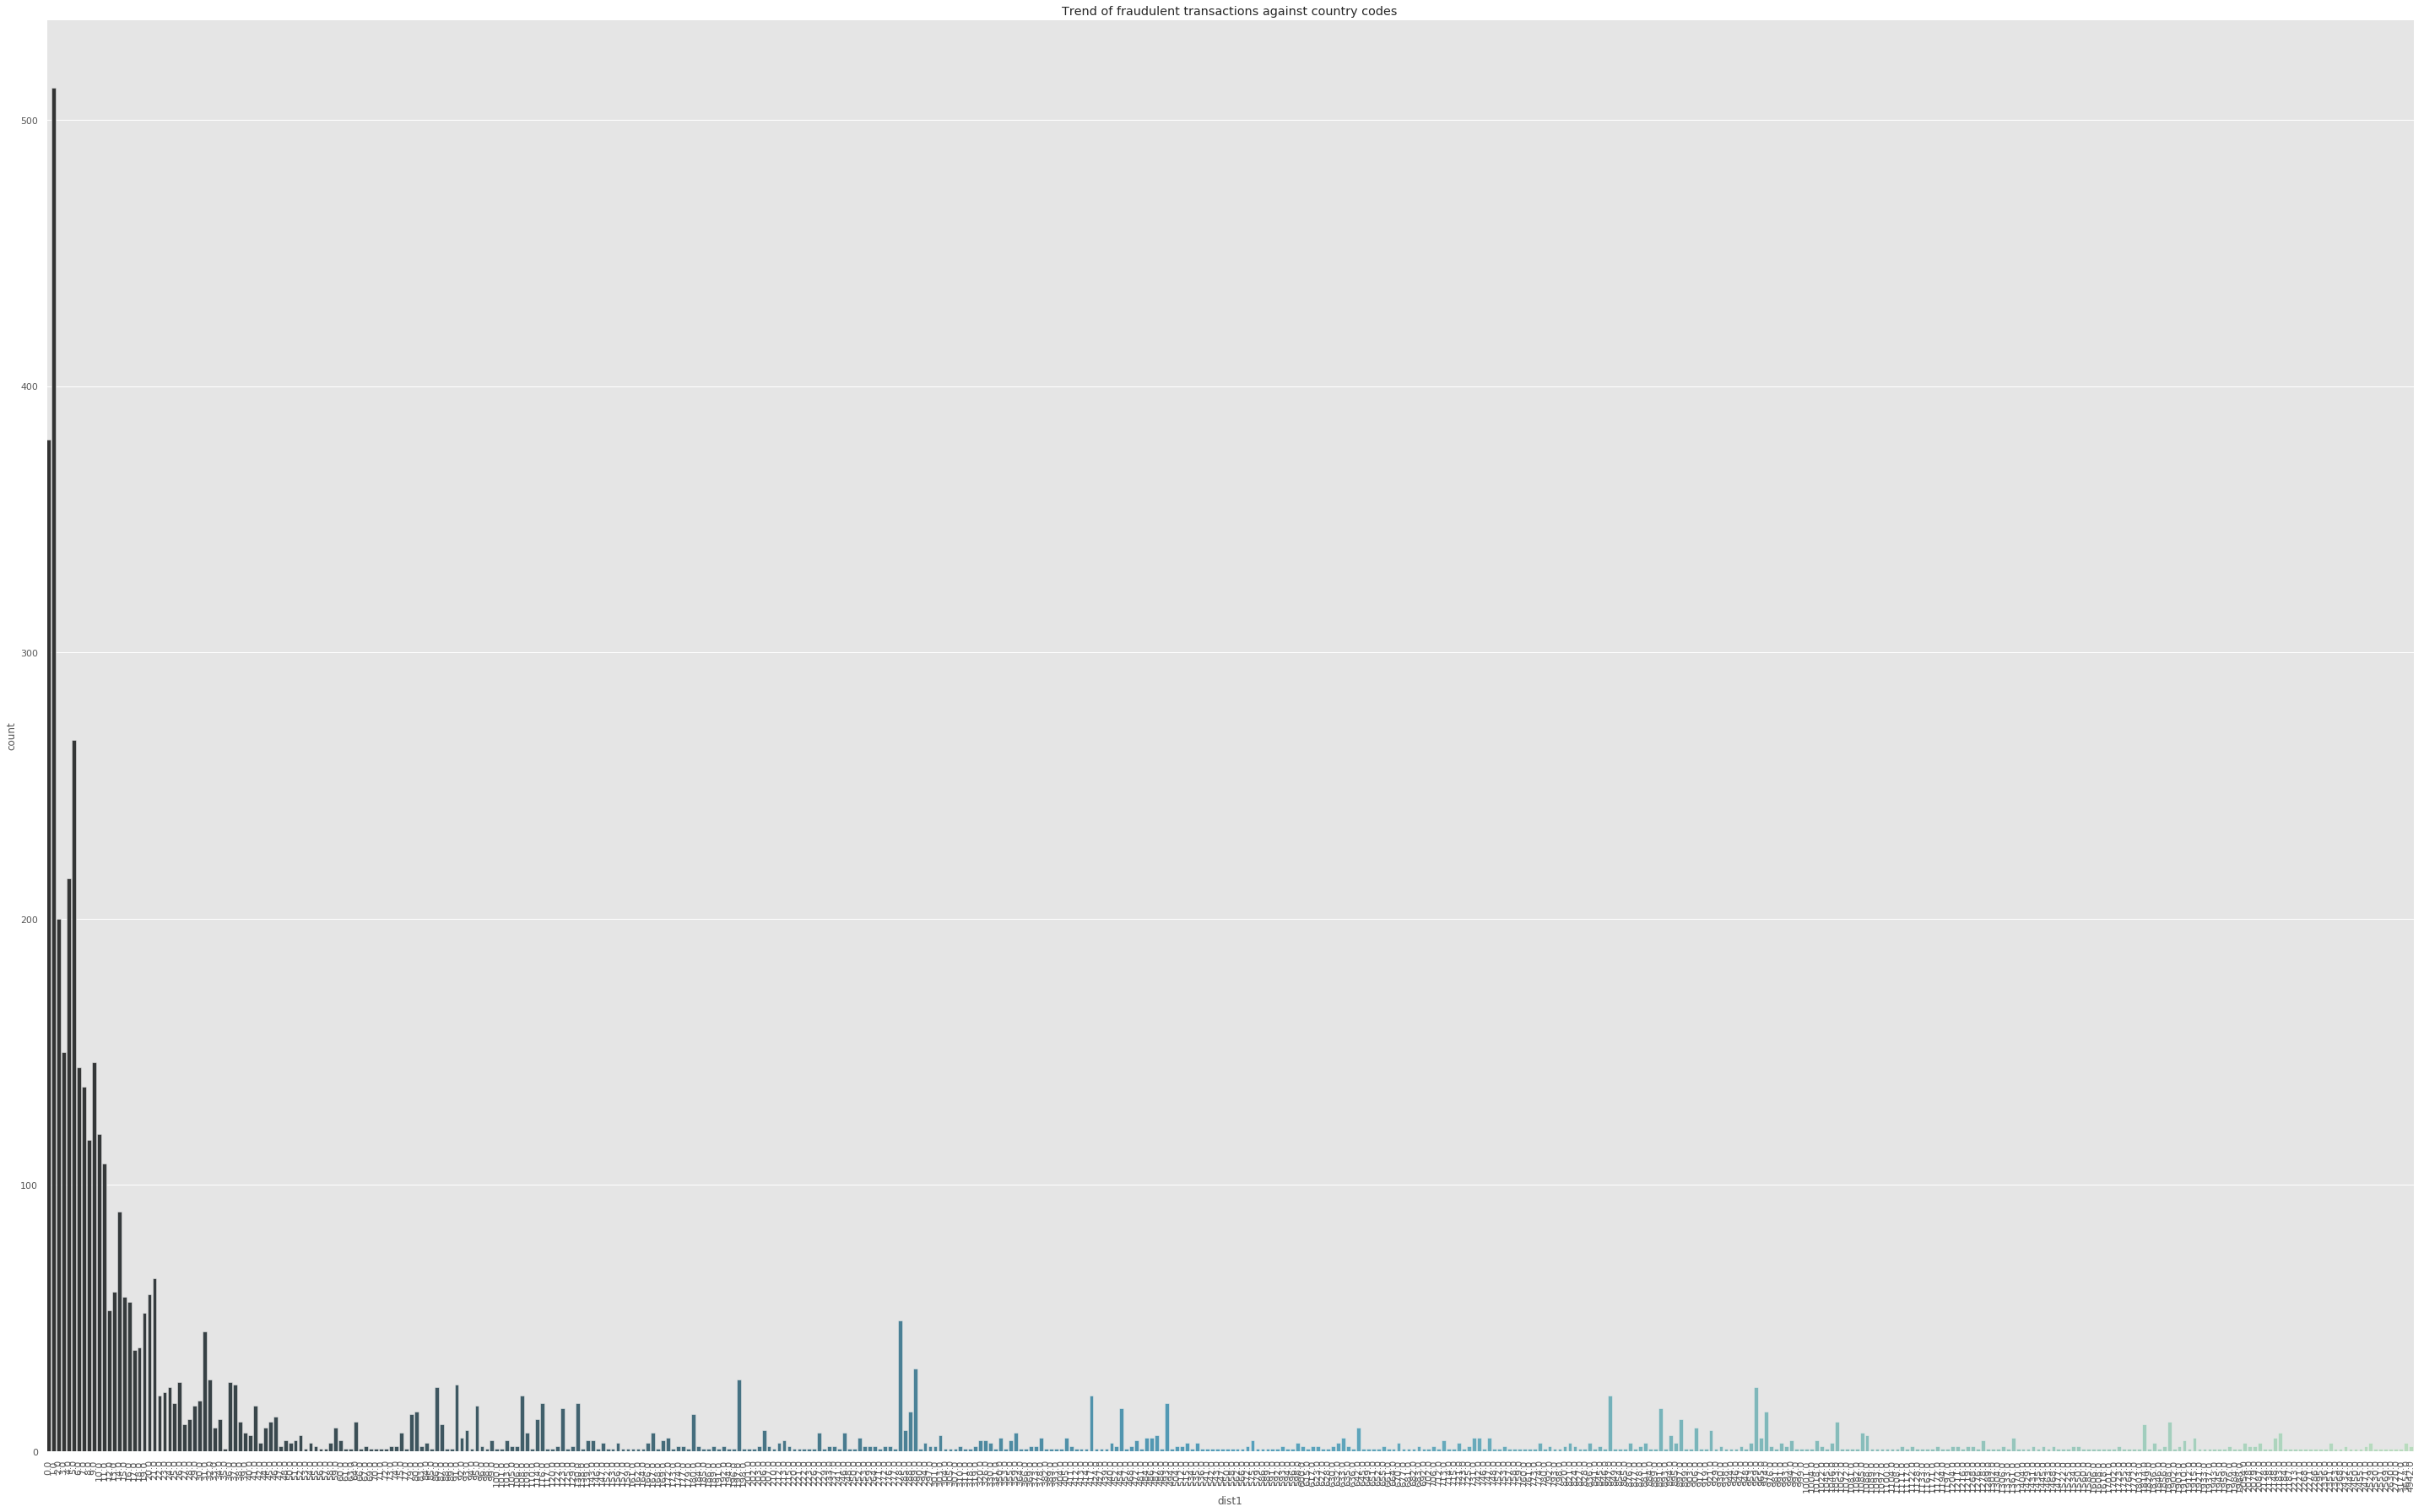

In [42]:
##Distance 1 (dist1) For Fraudulent Transactions

plt.figure(figsize=(40,25))
ax = sns.countplot(x="dist1", data=fraud_dataset, palette="GnBu_d");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Trend of fraudulent transactions against country codes')
plt.tight_layout()

As we can see from the plot above, there are many arbitrary values of dist1 (some form of distance). There are also a lot of NaN values as we move along the positive X-direction.

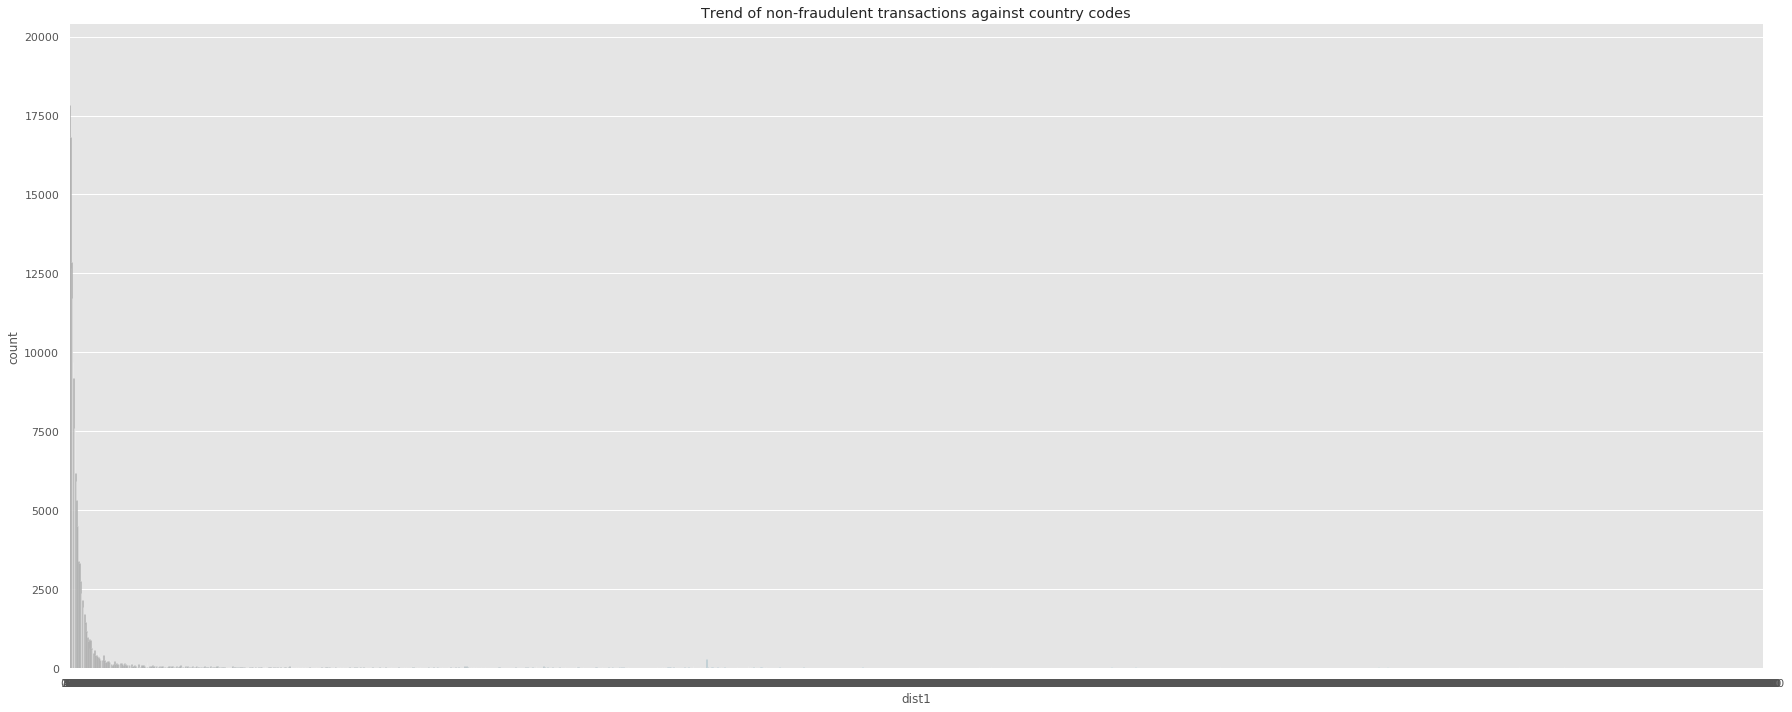

In [43]:
##Distance 1 (dist1) For Non-Fraudulent Transactions

plt.figure(figsize=(25,10))
ax = sns.countplot(x="dist1", data=nonfraud_dataset, palette="GnBu_d");
plt.title('Trend of non-fraudulent transactions against country codes')
plt.tight_layout()

As we can see from the plot above, there are a lot of NaN values as we move along the positive X-direction.

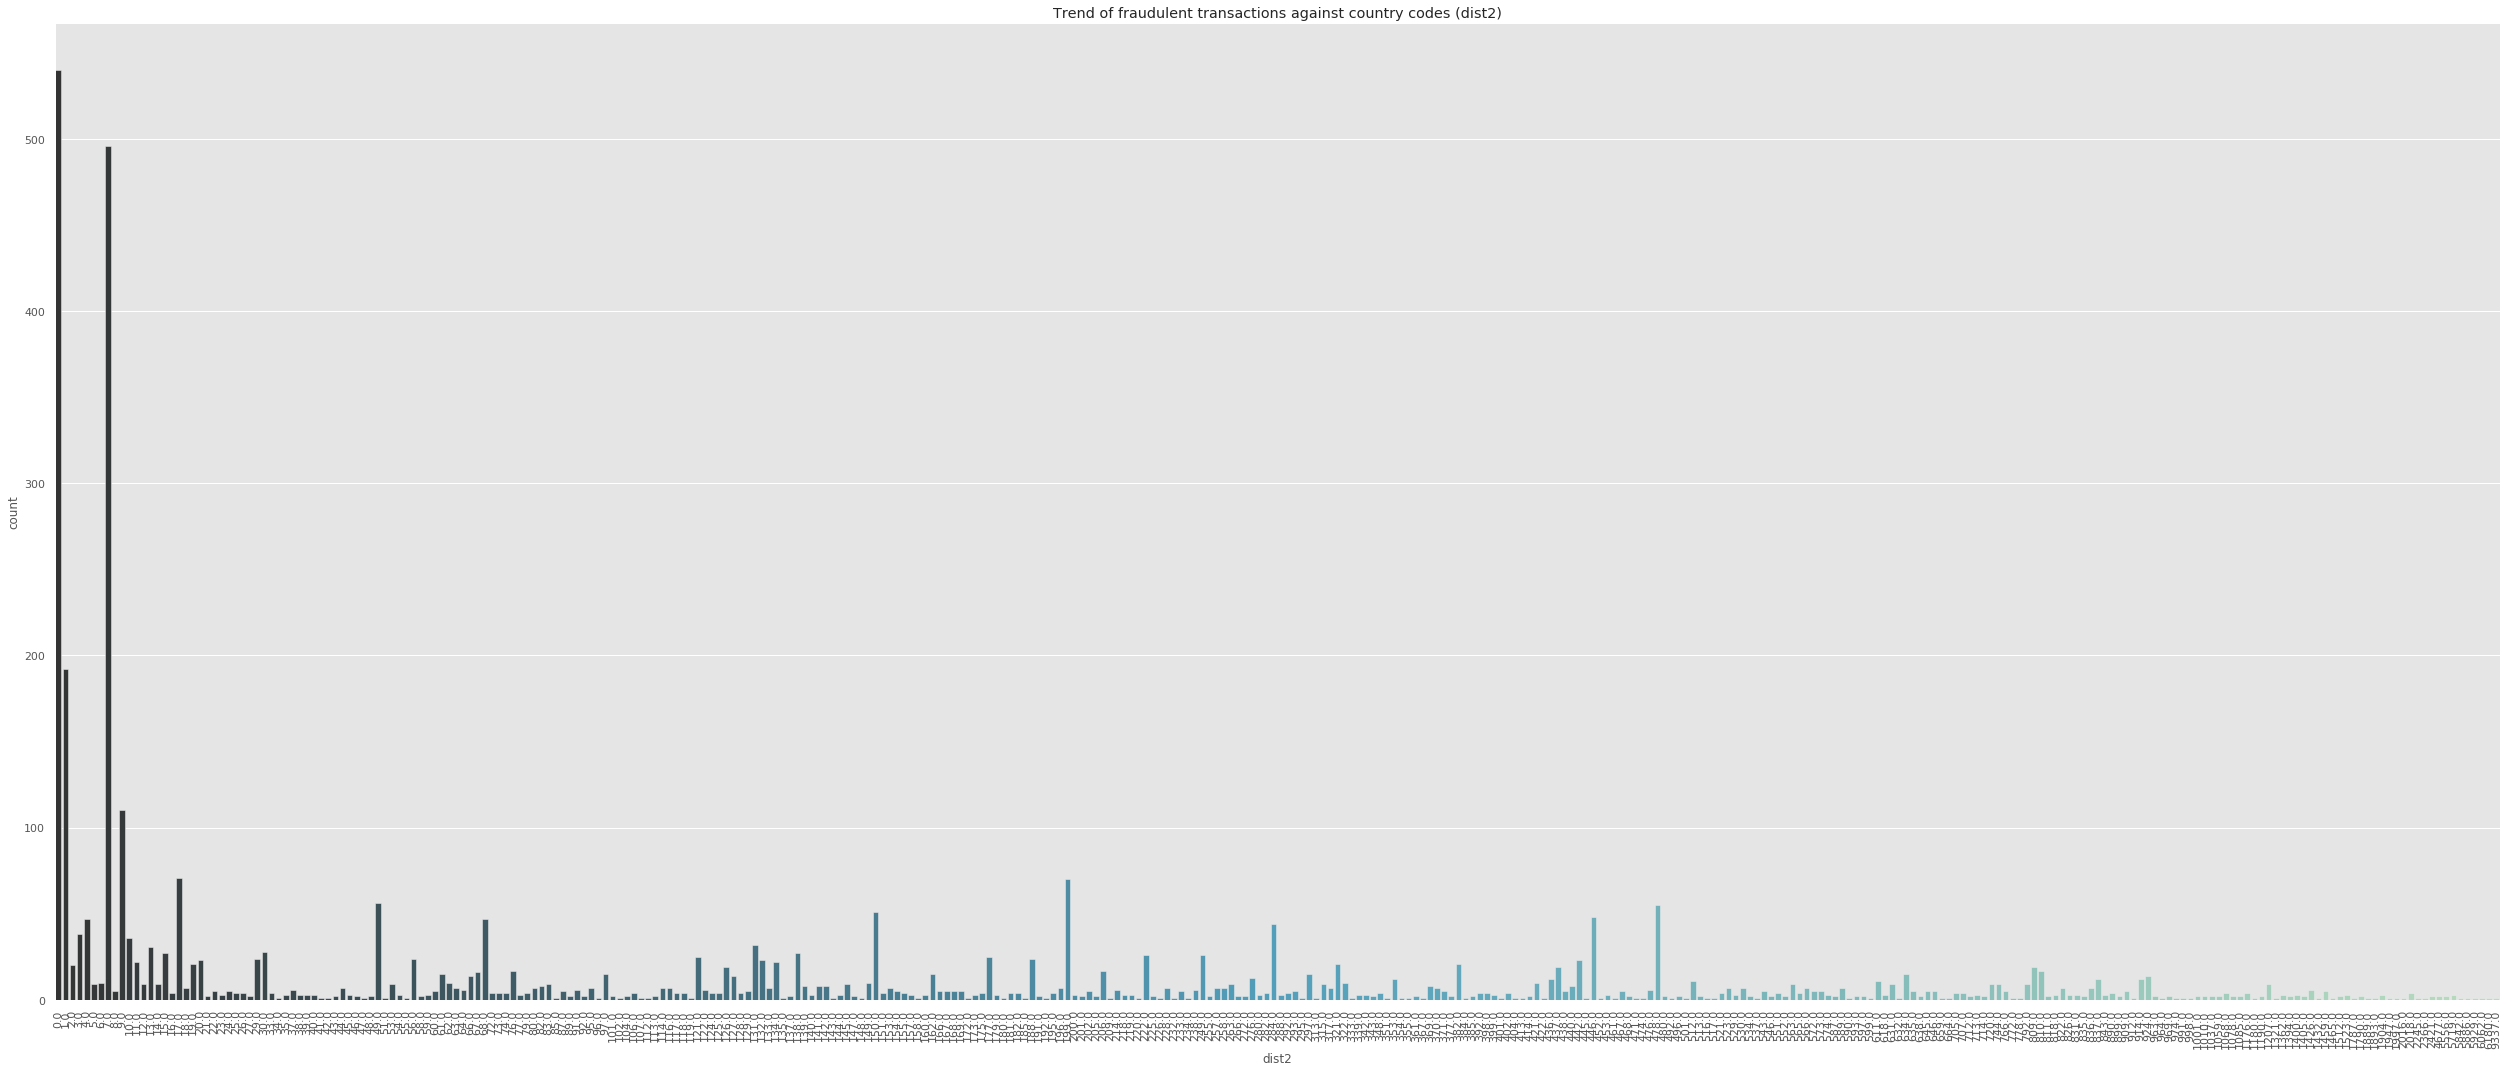

In [129]:
##Distance 2 (dist2) For Fraudulent Transactions

plt.figure(figsize=(35,15))
ax = sns.countplot(x="dist2", data=fraud_dataset, palette="GnBu_d");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Trend of fraudulent transactions against country codes (dist2)')
plt.tight_layout()

While plotting the count of fraudulent transactions against dist2, we can see that there are certain fraudulent transactions near the small range of dist2 and it decreases towards the right as we move along the positive X-direction.

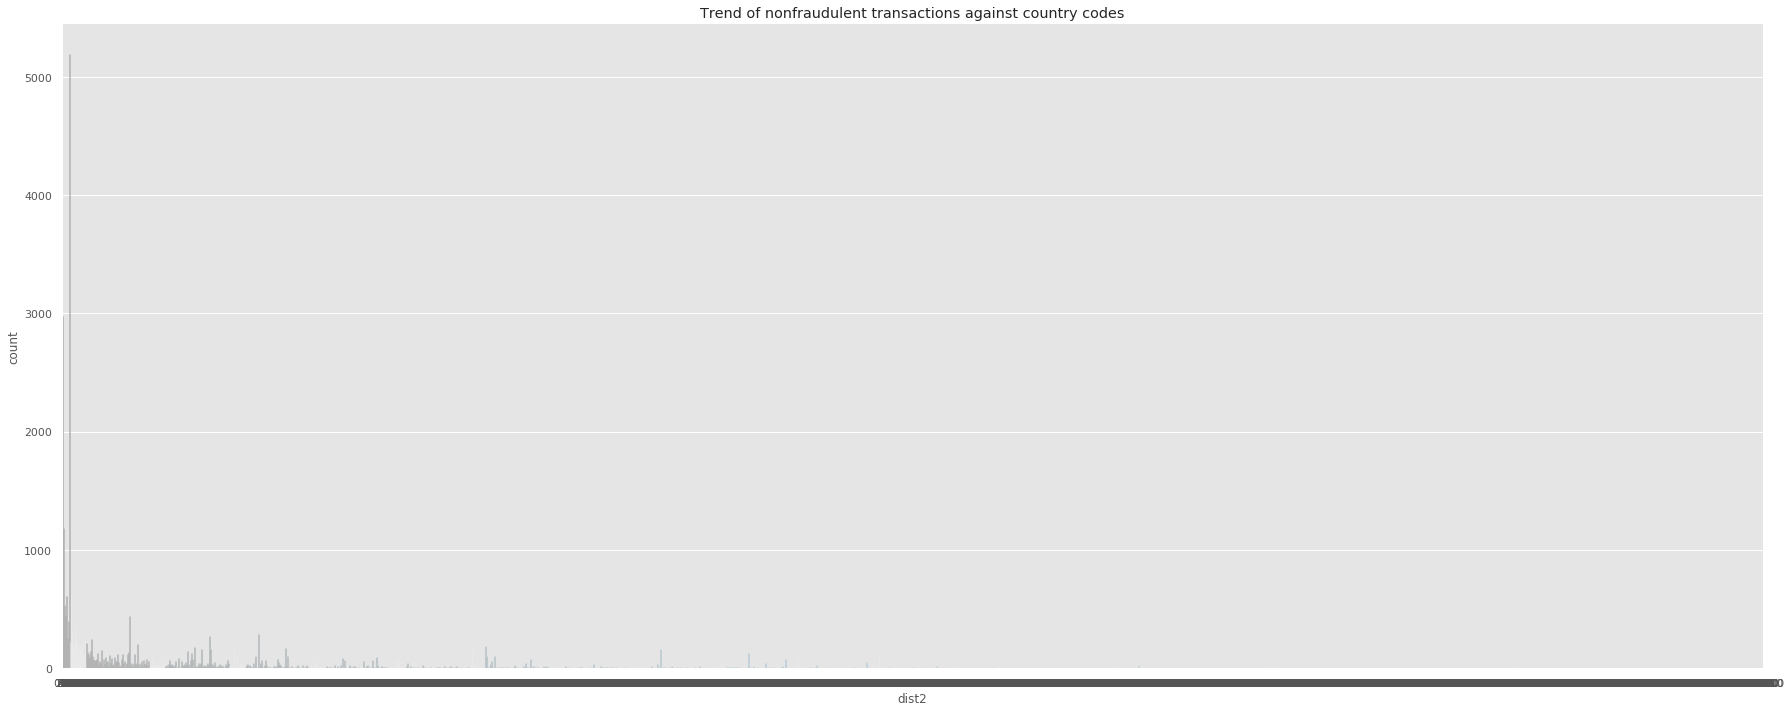

In [45]:
##Distance 2 (dist2) For NonFraudulent Transactions

plt.figure(figsize=(25,10))
ax = sns.countplot(x="dist2", data=nonfraud_dataset, palette="GnBu_d");
plt.title('Trend of nonfraudulent transactions against country codes')
plt.tight_layout()

From the above plot, the count of non-fraudulent transactions against dist2, we can see that there are certain non-fraudulent transactions near the small range of dist2 and it decreases towards the right as we move along the positive X-direction.

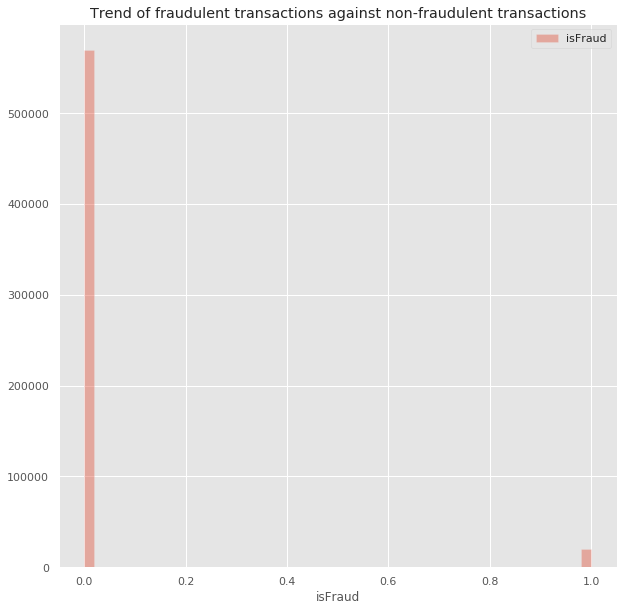

<Figure size 432x288 with 0 Axes>

In [46]:
##Fraud Vs Non-fraud Transactions

plt.figure(figsize=(10,10))
ax = sns.distplot(feature_dataset['isFraud'], hist = True, kde = False,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'isFraud')
plt.title('Trend of fraudulent transactions against non-fraudulent transactions')
plt.legend();
plt.show()
plt.tight_layout()

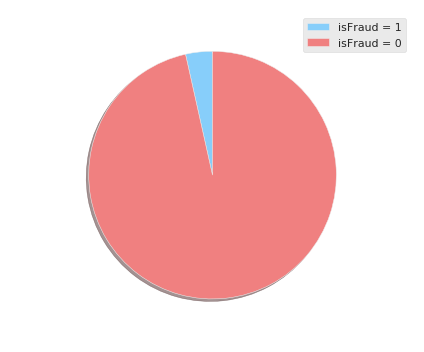

In [47]:
#Pie-chart to denote fraudulent transactions and non-fraudulent transactions 

fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)
size_fraud = fraud_dataset.shape[0]
size_nonfraud = nonfraud_dataset.shape[0]
labels = ['isFraud = 1', 'isFraud = 0']
sizes = [size_fraud,size_nonfraud]
colors = ['lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


As we can see from the above plots, the number of fraudulent transactions is much lesser than the non-fraudulent transactions. So we can easily know the probability of fraudulent transactions among the total number of transactions. This will be a helpful information which we can utilize during the prediction of fraudulent transactions using a machine learning model. Hence we can train our model with this data to give us the accuracy of the model. 

## Part 2 - Transaction Frequency

In [48]:
##to calculate the transaction frequency, we first start by checking the combined dataframe
feature_dataset.head(2)

,TransactionID,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2
0,2987000,NaN,NaN,0,86400,68.5,W,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN
1,2987001,NaN,NaN,0,86401,29.0,W,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN


In [49]:
##to get the values of the dataset associated with a particular country code for which the transactions is the maximum.

highest_addr2 = feature_dataset.loc[feature_dataset['addr2'] == 87.0]
highest_addr2.shape

(520481, 15)

In [50]:
##calculating the time of the day (in 24 hours format)
##reseting the index of the newly formed dataset

from datetime import datetime
transaction_time = highest_addr2['TransactionDT'].apply(lambda x: datetime.fromtimestamp(x).strftime("%H"))
transaction_time = transaction_time.reset_index()
print(transaction_time)

         index TransactionDT
0            0            00
1            1            00
2            2            00
3            3            00
4            4            00
5            5            00
6            6            00
7            7            00
8            8            00
9            9            00
10          12            00
11          13            00
12          14            00
13          15            00
14          16            00
15          17            00
16          18            00
17          19            00
18          20            00
19          21            00
20          22            00
21          23            00
22          24            00
23          25            00
24          26            00
25          27            00
26          28            00
27          29            00
28          30            00
29          31            00
...        ...           ...
520451  590506            23
520452  590507            23
520453  590508

In [51]:
feature_dataset['TransactionDT'].shape

(590540,)

In [52]:
feature_dataset.shape

(590540, 15)

In [53]:
transaction_time.shape

(520481, 2)

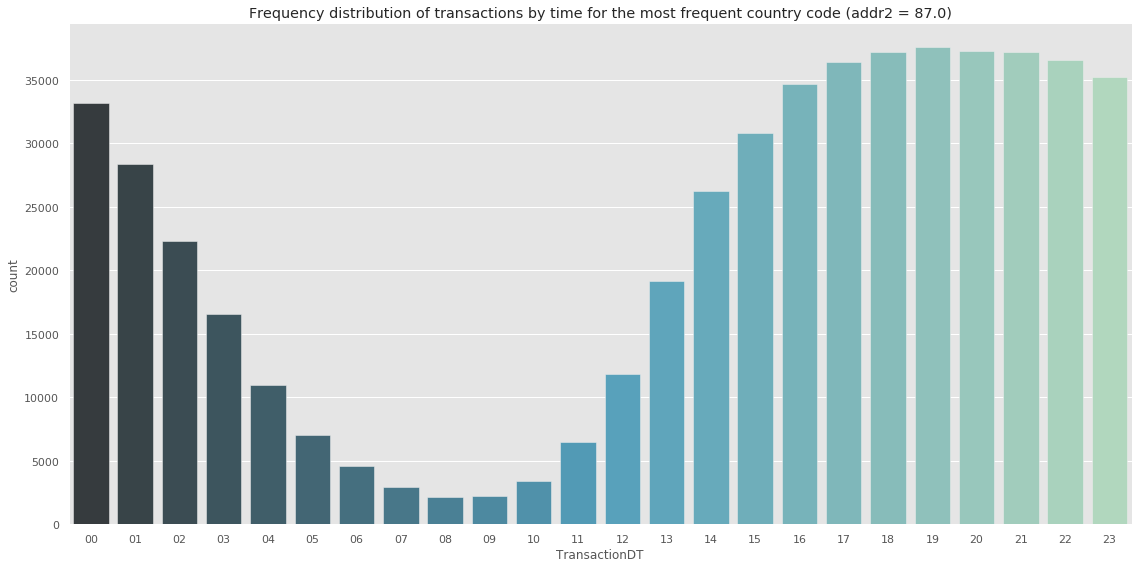

In [54]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x= "TransactionDT", data=transaction_time, palette="GnBu_d");
plt.title('Frequency distribution of transactions by time for the most frequent country code (addr2 = 87.0)')
plt.tight_layout()

The steps followed to acquire the above transaction frequency are defined as follows:
1. to calculate the transaction frequency, we first start by checking the combined dataframe
2. to get the values of the dataset associated with a particular country code for which the transactions is the maximum.
3. calculating the time of the day (in 24 hours format)
4. resetting the index of the newly formed dataset
5. plotting the number of transactions (count) against the hours of the day.

## Part 3 - Product Code

In [0]:
from statistics import median

In [56]:
##ProductCD Vs Transaction Amount
##Starting the combined dataset from the first step
##Splitting the dataset according to the product codes present in the dataset, using groupby.
##Calculating the median of the transaction amounts of each product codes, because it would be worng for us to assume that the transaction amounts for a particular product code will always be the same.
##resetting the index of the newly formed dataset

dataframe = feature_dataset.groupby(['ProductCD'])
transaction_amount = dataframe['TransactionAmt'].median()
transaction_amount = transaction_amount.reset_index()
print(transaction_amount)

  ProductCD  TransactionAmt
0         C          31.191
1         H          50.000
2         R         125.000
3         S          35.000
4         W          78.500


<function matplotlib.pyplot.show>

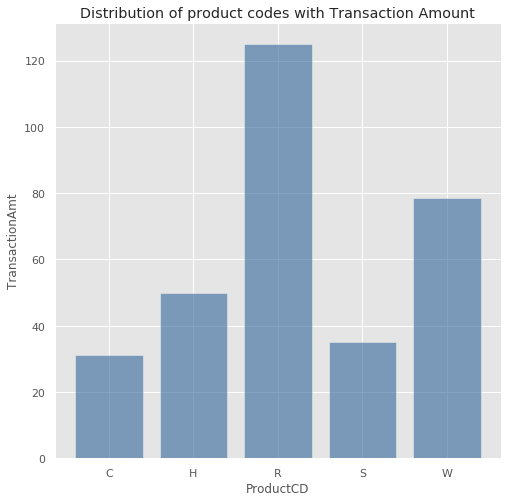

In [57]:
plt.figure(figsize=(8,8))
plt.bar("ProductCD", "TransactionAmt", align='center', data = transaction_amount, color=[0.2, 0.4, 0.6, 0.6])
plt.xlabel('ProductCD', horizontalalignment='center')
plt.ylabel('TransactionAmt')
plt.title('Distribution of product codes with Transaction Amount')
plt.show

As revealed by the plot above, the most expensive product code would be 'R' and the cheapest product code would be 'C'. 
The product codes lie in the below given order.
R > W > H > S > C

The steps followed to acquire which codes correspond to the most expensive products and which to the cheapest products, are defined as follows:
1. Starting the combined dataset from the first step
2. Splitting the dataset according to the product codes present in the dataset, using groupby.
3. Calculating the median of the transaction amounts of each product codes, because it would be worng for us to assume that the transaction amounts for a particular product code will always be the same.
4. Resetting the index of the newly formed dataset
5. Plotting Product codes against Transaction Amount

## Part 4 - Correlation Coefficient

In [58]:
print(feature_dataset)

        TransactionID DeviceType  ...   dist1   dist2
0             2987000        NaN  ...    19.0     NaN
1             2987001        NaN  ...     NaN     NaN
2             2987002        NaN  ...   287.0     NaN
3             2987003        NaN  ...     NaN     NaN
4             2987004     mobile  ...     NaN     NaN
5             2987005        NaN  ...    36.0     NaN
6             2987006        NaN  ...     0.0     NaN
7             2987007        NaN  ...     NaN     NaN
8             2987008     mobile  ...     NaN     NaN
9             2987009        NaN  ...    19.0     NaN
10            2987010    desktop  ...     NaN     NaN
11            2987011    desktop  ...     NaN    30.0
12            2987012        NaN  ...     NaN     NaN
13            2987013        NaN  ...     NaN     NaN
14            2987014        NaN  ...     NaN     NaN
15            2987015        NaN  ...     3.0     NaN
16            2987016    desktop  ...     NaN     NaN
17            2987017    des

In [59]:
## We had already worked out the time of the day in 24 hours format in question 2. 
## Making use of that dataset - adding the transaction amount column in the new dataset. 
## splitting the new dataset according to the time of the day
## Taking out the sum of the transaction amounts occurring at a particular hour of the day as we need to find out the total purchase amount.
## Resetting the index of the dataset to plot the purchase amount with the time of the day.

transaction_time.shape
transaction_time['TransactionAmt'] = feature_dataset['TransactionAmt']
transaction_time.head()
totaltransactiondataset = transaction_time.groupby(['TransactionDT']).sum()
totaltransactiondataset = totaltransactiondataset.reset_index()
totaltransactiondataset.head()

,TransactionDT,index,TransactionAmt
0,00,9824814184,4.456879e+06
1,01,8245761193,3.802910e+06
2,02,6342760434,2.956905e+06
3,03,4612543005,2.158018e+06
4,04,2898598665,1.442176e+06


<function matplotlib.pyplot.show>

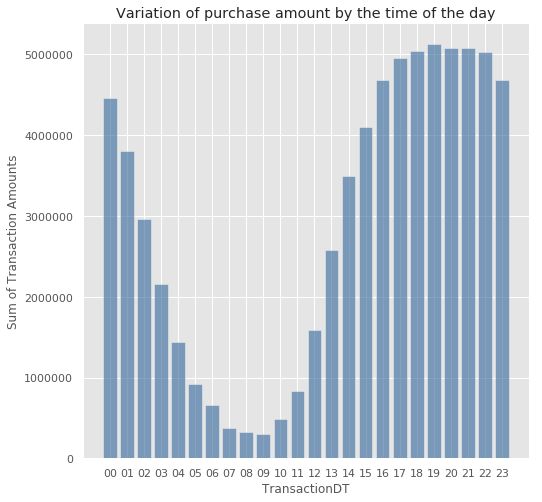

In [60]:
##Plotting the purchase amount with the time of the day

plt.figure(figsize=(8,8))
plt.bar("TransactionDT", "TransactionAmt", align='center', data = totaltransactiondataset, color=[0.2, 0.4, 0.6, 0.6])
plt.xlabel('TransactionDT', horizontalalignment='center')
plt.ylabel('Sum of Transaction Amounts')
plt.title('Variation of purchase amount by the time of the day')
plt.show

In [0]:
from scipy.stats import spearmanr

In [62]:
## To find the correlation co-efficient by Spearman Rank Correlation
## Spearman Rank Correlation comes out to be 0.6139

spearman_coefficient, p = spearmanr(totaltransactiondataset['TransactionAmt'], totaltransactiondataset['TransactionDT'])
print(spearman_coefficient)

0.6347826086956522


The steps followed to acquire the above, are defined as follows:
1. We had already worked out the time of the day in 24 hours format in question 2. 
2. Making use of that dataset - adding the transaction amount column in the new dataset. 
3. splitting the new dataset according to the time of the day
4. Taking out the sum of the transaction amounts occurring at a particular hour of the day as we need to find out the total purchase amount.
5. Resetting the index of the dataset to plot the purchase amount with the time of the day.
6. Plotting the purchase amount with the time of the day

7. To find the correlation co-efficient by Spearman Rank Correlation

## Spearman Rank Correlation comes out to be 0.6347

## Part 5 - Interesting Plot

In Question 4, we were supposed to plot the purchase amount with the time of the day. For that, the sum of the transaction amount for each product code has been considered above.
But if we take the median of the transaction amounts for each product, let us kind out below:

In [63]:
transaction_time.shape
transaction_time['TransactionAmt'] = feature_dataset['TransactionAmt']
transaction_time.head()
td = transaction_time.groupby(['TransactionDT']).median()
td = td.reset_index()
td.head()

,TransactionDT,index,TransactionAmt
0,00,301176.0,68.9500
1,01,288576.0,67.9500
2,02,277642.0,67.9500
3,03,271609.5,67.9500
4,04,257022.0,73.1145


<function matplotlib.pyplot.show>

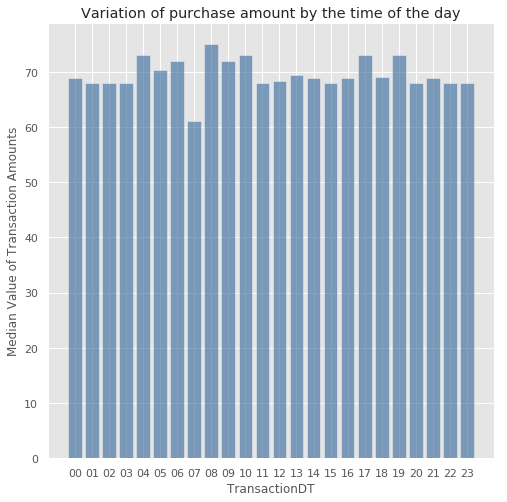

In [64]:
plt.figure(figsize=(8,8))
plt.bar("TransactionDT", "TransactionAmt", align='center', data = td, color=[0.2, 0.4, 0.6, 0.6])
plt.xlabel('TransactionDT', horizontalalignment='center')
plt.ylabel('Median Value of Transaction Amounts')
plt.title('Variation of purchase amount by the time of the day')
plt.show

Whereas for the sum of the transaction amounts, the plot is given below:

<function matplotlib.pyplot.show>

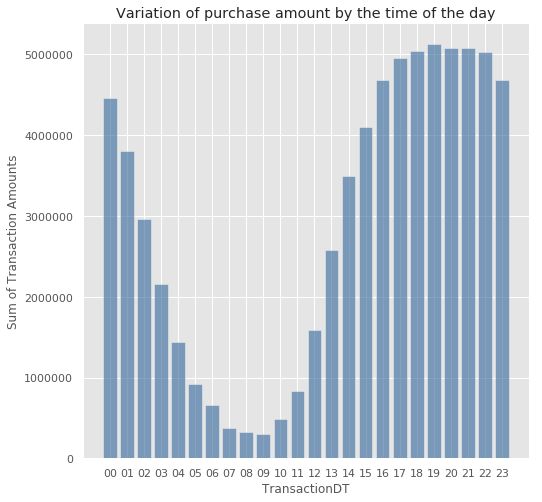

In [65]:
plt.figure(figsize=(8,8))
plt.bar("TransactionDT", "TransactionAmt", align='center', data = totaltransactiondataset, color=[0.2, 0.4, 0.6, 0.6])
plt.xlabel('TransactionDT', horizontalalignment='center')
plt.ylabel('Sum of Transaction Amounts')
plt.title('Variation of purchase amount by the time of the day')
plt.show

So as we can see from both the plots above, the plots infer different outcomes as we are dealing with different computation of the parameters.
From the median of the transaction amounts, we can see that the transactions don't vary much with the time of the day.
As we can see for the sum of transaction amounts, the transactions are the maximum during the noon time (i.e. in the range of 17:00 hrs - 22:00 hrs) and they are minimum during the early morning slot (i.e. in the range of 07:00hrs - 10:00 hrs). 

## Part 6 - Prediction Model

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [67]:
feature_dataset = dataset[['TransactionID', 'DeviceType', 'DeviceInfo', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'addr1', 'addr2', 'dist1', 'dist2']]
feature_dataset.describe()
feature_dataset.head(2)

,TransactionID,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2
0,2987000,NaN,NaN,0,86400,68.5,W,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN
1,2987001,NaN,NaN,0,86401,29.0,W,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN


In [0]:
# removing the irrelevant columns to include the necessary columns as parameters to predict using the baseline model
cols_to_drop = ["DeviceType","TransactionID","R_emaildomain","dist2","DeviceInfo","addr1","P_emaildomain", "TransactionDT"]
df = feature_dataset.drop(columns=cols_to_drop,axis=1)


In [69]:
df.head()

,isFraud,TransactionAmt,ProductCD,card4,card6,addr2,dist1
0,0,68.5,W,discover,credit,87.0,19.0
1,0,29.0,W,mastercard,credit,87.0,NaN
2,0,59.0,W,visa,debit,87.0,287.0
3,0,50.0,W,mastercard,debit,87.0,NaN
4,0,50.0,H,mastercard,credit,87.0,NaN


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 7 columns):
isFraud           590540 non-null int64
TransactionAmt    590540 non-null float64
ProductCD         590540 non-null object
card4             588963 non-null object
card6             588969 non-null object
addr2             524834 non-null float64
dist1             238269 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 56.0+ MB


In [0]:
deep_df = df.copy(deep = True)

In [72]:
numerical_columns = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64') and col != 'Exited']
print(numerical_columns)

['isFraud', 'TransactionAmt', 'addr2', 'dist1']


In [73]:
df[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]

,isFraud,TransactionAmt,addr2,dist1
min,0.00000,0.251000,10.00000,0.00000
max,1.00000,31937.391000,102.00000,10286.00000
mean,0.03499,135.027176,86.80063,118.50218
50%,0.00000,68.769000,87.00000,8.00000


In [74]:
df[df['dist1'] == df['dist1'].max()]

,isFraud,TransactionAmt,ProductCD,card4,card6,addr2,dist1
273014,0,117.0,W,visa,debit,87.0,10286.0


In [75]:
df

,isFraud,TransactionAmt,ProductCD,card4,card6,addr2,dist1
0,0,68.500,W,discover,credit,87.0,19.0
1,0,29.000,W,mastercard,credit,87.0,NaN
2,0,59.000,W,visa,debit,87.0,287.0
3,0,50.000,W,mastercard,debit,87.0,NaN
4,0,50.000,H,mastercard,credit,87.0,NaN
5,0,49.000,W,visa,debit,87.0,36.0
6,0,159.000,W,visa,debit,87.0,0.0
7,0,422.500,W,visa,debit,87.0,NaN
8,0,15.000,H,visa,debit,87.0,NaN
9,0,117.000,W,mastercard,debit,87.0,19.0


In [76]:
# Replace using median 
median = df['dist1'].median()
print(median)
df['dist1'].fillna(median, inplace=True)

8.0


In [77]:
df

,isFraud,TransactionAmt,ProductCD,card4,card6,addr2,dist1
0,0,68.500,W,discover,credit,87.0,19.0
1,0,29.000,W,mastercard,credit,87.0,8.0
2,0,59.000,W,visa,debit,87.0,287.0
3,0,50.000,W,mastercard,debit,87.0,8.0
4,0,50.000,H,mastercard,credit,87.0,8.0
5,0,49.000,W,visa,debit,87.0,36.0
6,0,159.000,W,visa,debit,87.0,0.0
7,0,422.500,W,visa,debit,87.0,8.0
8,0,15.000,H,visa,debit,87.0,8.0
9,0,117.000,W,mastercard,debit,87.0,19.0


In [78]:
##Cleaning the data - by replacing all the NaN values in the dataset by the particular column using the median for only the numerical values

median1 = df['addr2'].median()
print(median1)
df['addr2'].fillna(median, inplace=True)

87.0


In [79]:
median = df['TransactionAmt'].median()
print(median)
df['TransactionAmt'].fillna(median, inplace=True)

68.769


In [80]:
df.describe()

,isFraud,TransactionAmt,addr2,dist1
count,590540.000000,590540.000000,590540.000000,590540.000000
mean,0.034990,135.027176,78.032936,52.585031
std,0.183755,239.162522,24.909082,242.353179
min,0.000000,0.251000,8.000000,0.000000
25%,0.000000,43.321000,87.000000,8.000000
50%,0.000000,68.769000,87.000000,8.000000
75%,0.000000,125.000000,87.000000,8.000000
max,1.000000,31937.391000,102.000000,10286.000000


In [81]:
df[df.isnull().any(axis=1)]
df["card4"].value_counts()


visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [0]:
df = df.fillna({"card4": "visa"})

In [83]:
df["card6"].value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [0]:
df = df.fillna({"card6": "debit"})

In [85]:
## Cleaning the dataset - for categorical data, Label Encoding the categorical values to successfully train the model with the training data.

lb_card4 = LabelEncoder()
df["card4_code"] = lb_card4.fit_transform(df["card4"])
df[["card4", "card4_code"]].head(11)
df

,isFraud,TransactionAmt,ProductCD,card4,card6,addr2,dist1,card4_code
0,0,68.500,W,discover,credit,87.0,19.0,1
1,0,29.000,W,mastercard,credit,87.0,8.0,2
2,0,59.000,W,visa,debit,87.0,287.0,3
3,0,50.000,W,mastercard,debit,87.0,8.0,2
4,0,50.000,H,mastercard,credit,87.0,8.0,2
5,0,49.000,W,visa,debit,87.0,36.0,3
6,0,159.000,W,visa,debit,87.0,0.0,3
7,0,422.500,W,visa,debit,87.0,8.0,3
8,0,15.000,H,visa,debit,87.0,8.0,3
9,0,117.000,W,mastercard,debit,87.0,19.0,2


In [86]:
lb_card6 = LabelEncoder()
df["card6_code"] = lb_card6.fit_transform(df["card6"])
df[["card6", "card6_code"]].head(11)
df

,isFraud,TransactionAmt,ProductCD,card4,card6,addr2,dist1,card4_code,card6_code
0,0,68.500,W,discover,credit,87.0,19.0,1,1
1,0,29.000,W,mastercard,credit,87.0,8.0,2,1
2,0,59.000,W,visa,debit,87.0,287.0,3,2
3,0,50.000,W,mastercard,debit,87.0,8.0,2,2
4,0,50.000,H,mastercard,credit,87.0,8.0,2,1
5,0,49.000,W,visa,debit,87.0,36.0,3,2
6,0,159.000,W,visa,debit,87.0,0.0,3,2
7,0,422.500,W,visa,debit,87.0,8.0,3,2
8,0,15.000,H,visa,debit,87.0,8.0,3,2
9,0,117.000,W,mastercard,debit,87.0,19.0,2,2


In [87]:
df["ProductCD"].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

In [0]:
df = df.fillna({"ProductCD": "W"})

In [89]:
lb_productCD = LabelEncoder()
df["productCD_code"] = lb_productCD.fit_transform(df["ProductCD"])
df[["ProductCD", "productCD_code"]].head(11)
df

,isFraud,TransactionAmt,ProductCD,card4,card6,addr2,dist1,card4_code,card6_code,productCD_code
0,0,68.500,W,discover,credit,87.0,19.0,1,1,4
1,0,29.000,W,mastercard,credit,87.0,8.0,2,1,4
2,0,59.000,W,visa,debit,87.0,287.0,3,2,4
3,0,50.000,W,mastercard,debit,87.0,8.0,2,2,4
4,0,50.000,H,mastercard,credit,87.0,8.0,2,1,1
5,0,49.000,W,visa,debit,87.0,36.0,3,2,4
6,0,159.000,W,visa,debit,87.0,0.0,3,2,4
7,0,422.500,W,visa,debit,87.0,8.0,3,2,4
8,0,15.000,H,visa,debit,87.0,8.0,3,2,1
9,0,117.000,W,mastercard,debit,87.0,19.0,2,2,4


In [0]:
## Preparing the final training dataset to contain only integer values, for all the columns and rows such that there exists no NaN values or non-numerical values.

df['ProductCD'] = df['productCD_code']
df['card4'] = df['card4_code']
df['card6'] = df['card6_code']
cols_to_drop = ["productCD_code","card4_code","card6_code"]
df = df.drop(columns=cols_to_drop,axis=1)

In [91]:
df

,isFraud,TransactionAmt,ProductCD,card4,card6,addr2,dist1
0,0,68.500,4,1,1,87.0,19.0
1,0,29.000,4,2,1,87.0,8.0
2,0,59.000,4,3,2,87.0,287.0
3,0,50.000,4,2,2,87.0,8.0
4,0,50.000,1,2,1,87.0,8.0
5,0,49.000,4,3,2,87.0,36.0
6,0,159.000,4,3,2,87.0,0.0
7,0,422.500,4,3,2,87.0,8.0
8,0,15.000,1,3,2,87.0,8.0
9,0,117.000,4,2,2,87.0,19.0


In [92]:
##reading the test datasets and preparing a combined dataset on which we have to predict the probability of a transaction being Fraudulent.

test_identity_dataset = pd.read_csv('test_identity.csv')
test_transaction_dataset = pd.read_csv('test_transaction.csv')
test_dataset = pd.merge(test_transaction_dataset,test_identity_dataset, on="TransactionID" , how = "left")
test_dataset

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3663554,18403323,57.950,W,12839,321.0,150.0,visa,226.0,debit,512.0,87.0,NaN,NaN,gmail.com,NaN,5.0,5.0,0.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0,4.0,0.0,10.0,4.0,36.0,36.0,35.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3663555,18403350,87.000,W,16560,476.0,150.0,visa,126.0,debit,110.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3663556,18403387,390.000,W,15066,170.0,150.0,mastercard,102.0,credit,194.0,87.0,303.0,NaN,gmail.com,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,11.0,1.0,NaN,NaN,NaN,126.0,4.0,NaN,NaN,NaN,NaN,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3663557,18403405,103.950,W,2803,100.0,150.0,visa,226.0,debit,494.0,87.0,3.0,NaN,gmail.com,NaN,152.0,148.0,0.0,0.0,135.0,95.0,0.0,0.0,77.0,0.0,122.0,0.0,407.0,108.0,128.0,128.0,13.0,644.0,13.0,NaN,NaN,NaN,NaN,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3663558,18403416,117.000,W,12544,321.0,150.0,visa,226.0,debit,476.0,87.0,8.0,NaN,NaN,NaN,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,1.0,8.0,2.0,69.0,69.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [93]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 1.6+ GB


In [94]:
test_identity_dataset.shape

(141907, 41)

In [95]:
test_dataset.shape

(506691, 433)

In [96]:
test_dataset = test_dataset[['TransactionAmt', 'ProductCD', 'card4', 'card6', 'addr1', 'addr2', 'dist1']]
test_dataset.describe()

,TransactionAmt,addr1,addr2,dist1
count,506691.000000,441082.000000,441082.000000,215474.000000
mean,134.725568,291.846514,86.723412,87.065270
std,245.779822,102.062730,2.987328,314.131694
min,0.018000,100.000000,10.000000,0.000000
25%,40.000000,204.000000,87.000000,3.000000
50%,67.950000,299.000000,87.000000,8.000000
75%,125.000000,330.000000,87.000000,20.000000
max,10270.000000,540.000000,102.000000,8081.000000


In [97]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Data columns (total 7 columns):
TransactionAmt    506691 non-null float64
ProductCD         506691 non-null object
card4             503605 non-null object
card6             503684 non-null object
addr1             441082 non-null float64
addr2             441082 non-null float64
dist1             215474 non-null float64
dtypes: float64(4), object(3)
memory usage: 30.9+ MB


In [98]:
numerical_columns = [col for col in test_dataset.columns if (test_dataset[col].dtype=='int64' or test_dataset[col].dtype=='float64') and col != 'Exited']
print(numerical_columns)

['TransactionAmt', 'addr1', 'addr2', 'dist1']


In [99]:
test_dataset[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]

,TransactionAmt,addr1,addr2,dist1
min,0.018000,100.000000,10.000000,0.00000
max,10270.000000,540.000000,102.000000,8081.00000
mean,134.725568,291.846514,86.723412,87.06527
50%,67.950000,299.000000,87.000000,8.00000


In [100]:
test_dataset[test_dataset['dist1'] == test_dataset['dist1'].max()]

,TransactionAmt,ProductCD,card4,card6,addr1,addr2,dist1
6636,26.95,W,visa,debit,220.0,87.0,8081.0


In [101]:
# Replace using median 
median = test_dataset['dist1'].median()
print(median)
test_dataset['dist1'].fillna(median, inplace=True)

8.0


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [102]:
median1 = test_dataset['addr2'].median()
print(median1)
test_dataset['addr2'].fillna(median, inplace=True)

87.0


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [103]:
median = test_dataset['TransactionAmt'].median()
print(median)
test_dataset['TransactionAmt'].fillna(median, inplace=True)

67.95


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [104]:
test_dataset.describe()

,TransactionAmt,addr1,addr2,dist1
count,506691.000000,441082.000000,506691.000000,506691.000000
mean,134.725568,291.846514,76.529893,41.623076
std,245.779822,102.062730,26.576883,208.546481
min,0.018000,100.000000,8.000000,0.000000
25%,40.000000,204.000000,87.000000,8.000000
50%,67.950000,299.000000,87.000000,8.000000
75%,125.000000,330.000000,87.000000,8.000000
max,10270.000000,540.000000,102.000000,8081.000000


In [105]:
test_dataset[test_dataset.isnull().any(axis=1)]
test_dataset["card4"].value_counts()

visa                334882
mastercard          158169
american express      7681
discover              2873
Name: card4, dtype: int64

In [0]:
test_dataset = test_dataset.fillna({"card4": "visa"})

In [107]:
test_dataset["card6"].value_counts()

debit          385021
credit         118662
charge card         1
Name: card6, dtype: int64

In [0]:
test_dataset = test_dataset.fillna({"card6": "debit"})

In [109]:
lb_card4_test = LabelEncoder()
test_dataset["card4_testcode"] = lb_card4_test.fit_transform(test_dataset["card4"])
test_dataset[["card4", "card4_testcode"]].head(11)
test_dataset

,TransactionAmt,ProductCD,card4,card6,addr1,addr2,dist1,card4_testcode
0,31.950,W,visa,debit,170.0,87.0,1.0,3
1,49.000,W,visa,debit,299.0,87.0,4.0,3
2,171.000,W,visa,debit,472.0,87.0,2635.0,3
3,284.950,W,visa,debit,205.0,87.0,17.0,3
4,67.950,W,mastercard,debit,264.0,87.0,6.0,2
5,57.950,W,visa,debit,512.0,87.0,8.0,3
6,87.000,W,visa,debit,110.0,87.0,8.0,3
7,390.000,W,mastercard,credit,194.0,87.0,303.0,2
8,103.950,W,visa,debit,494.0,87.0,3.0,3
9,117.000,W,visa,debit,476.0,87.0,8.0,3


In [110]:
lb_card6_test = LabelEncoder()
test_dataset["card6_testcode"] = lb_card6_test.fit_transform(test_dataset["card6"])
test_dataset[["card6", "card6_testcode"]].head(11)
test_dataset

,TransactionAmt,ProductCD,card4,card6,addr1,addr2,dist1,card4_testcode,card6_testcode
0,31.950,W,visa,debit,170.0,87.0,1.0,3,2
1,49.000,W,visa,debit,299.0,87.0,4.0,3,2
2,171.000,W,visa,debit,472.0,87.0,2635.0,3,2
3,284.950,W,visa,debit,205.0,87.0,17.0,3,2
4,67.950,W,mastercard,debit,264.0,87.0,6.0,2,2
5,57.950,W,visa,debit,512.0,87.0,8.0,3,2
6,87.000,W,visa,debit,110.0,87.0,8.0,3,2
7,390.000,W,mastercard,credit,194.0,87.0,303.0,2,1
8,103.950,W,visa,debit,494.0,87.0,3.0,3,2
9,117.000,W,visa,debit,476.0,87.0,8.0,3,2


In [111]:
lb_productCD_test = LabelEncoder()
test_dataset["productCD_testcode"] = lb_productCD_test.fit_transform(test_dataset["ProductCD"])
test_dataset[["ProductCD", "productCD_testcode"]].head(11)
test_dataset

,TransactionAmt,ProductCD,card4,card6,addr1,addr2,dist1,card4_testcode,card6_testcode,productCD_testcode
0,31.950,W,visa,debit,170.0,87.0,1.0,3,2,4
1,49.000,W,visa,debit,299.0,87.0,4.0,3,2,4
2,171.000,W,visa,debit,472.0,87.0,2635.0,3,2,4
3,284.950,W,visa,debit,205.0,87.0,17.0,3,2,4
4,67.950,W,mastercard,debit,264.0,87.0,6.0,2,2,4
5,57.950,W,visa,debit,512.0,87.0,8.0,3,2,4
6,87.000,W,visa,debit,110.0,87.0,8.0,3,2,4
7,390.000,W,mastercard,credit,194.0,87.0,303.0,2,1,4
8,103.950,W,visa,debit,494.0,87.0,3.0,3,2,4
9,117.000,W,visa,debit,476.0,87.0,8.0,3,2,4


In [0]:
test_dataset['ProductCD'] = test_dataset['productCD_testcode']
test_dataset['card4'] = test_dataset['card4_testcode']
test_dataset['card6'] = test_dataset['card6_testcode']
cols_to_drop = ["productCD_testcode","card4_testcode","card6_testcode"]
test_dataset = test_dataset.drop(columns=cols_to_drop,axis=1)

In [113]:
test_dataset

,TransactionAmt,ProductCD,card4,card6,addr1,addr2,dist1
0,31.950,4,3,2,170.0,87.0,1.0
1,49.000,4,3,2,299.0,87.0,4.0
2,171.000,4,3,2,472.0,87.0,2635.0
3,284.950,4,3,2,205.0,87.0,17.0
4,67.950,4,2,2,264.0,87.0,6.0
5,57.950,4,3,2,512.0,87.0,8.0
6,87.000,4,3,2,110.0,87.0,8.0
7,390.000,4,2,1,194.0,87.0,303.0
8,103.950,4,3,2,494.0,87.0,3.0
9,117.000,4,3,2,476.0,87.0,8.0


In [114]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 7 columns):
isFraud           590540 non-null int64
TransactionAmt    590540 non-null float64
ProductCD         590540 non-null int64
card4             590540 non-null int64
card6             590540 non-null int64
addr2             590540 non-null float64
dist1             590540 non-null float64
dtypes: float64(3), int64(4)
memory usage: 36.0 MB


In [115]:
frauddata = df['isFraud']
frauddataset= frauddata.drop(frauddata.index[506690:590539])
frauddataset.shape

(506691,)

In [116]:
traindf = df.drop(columns='isFraud',axis=1)
traindf = traindf.drop(traindf.index[506690:590539])
traindf.shape

(506691, 6)

In [117]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 590539
Data columns (total 6 columns):
TransactionAmt    506691 non-null float64
ProductCD         506691 non-null int64
card4             506691 non-null int64
card6             506691 non-null int64
addr2             506691 non-null float64
dist1             506691 non-null float64
dtypes: float64(3), int64(3)
memory usage: 27.1 MB


In [0]:
test_dataset = test_dataset.drop(columns='addr1',axis=1)

In [0]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(traindf)
X_test = sc_x.fit_transform(test_dataset)

In [120]:
X_test.shape

(506691, 6)

In [121]:
clf = LogisticRegression()
clf.fit(X_train, frauddataset)
preds = clf.predict(test_dataset)
print(preds)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 1 ... 0 0 0]


In [122]:
# Using the score method to get the accuracy of model
score = clf.score(X_test, preds)
print(score)

0.8293496430763523


In [0]:
validationdf = pd.read_csv('sample_submission.csv')

In [0]:
## reading the sample submission file into the dataframe

validationdf['isFraud'] = preds
validationdf.to_csv('sample_submission.csv', index=False)

In [125]:

validationdf.shape

(506691, 2)

In [126]:
validationdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Data columns (total 2 columns):
TransactionID    506691 non-null int64
isFraud          506691 non-null int64
dtypes: int64(2)
memory usage: 7.7 MB


In [127]:
validationdf.head()

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,1
3,3663552,1
4,3663553,0


The steps followed to build a prediction model are defined as follows:
1. Removing the irrelevant columns to include the necessary columns as parameters to predict using the baseline model
2. Cleaning the dataset - by replacing all the NaN values in the dataset by the particular column using the median for only the numerical values
3. Cleaning the dataset - for categorical data, Label Encoding the categorical values to successfully train the model with the training data.
4. Preparing the final training dataset to contain only integer values, for all the columns and rows such that there exists no NaN values or non-numerical values.
5. Reading the test datasets and preparing a combined dataset on which we have to predict the probability of a transaction being Fraudulent.
6. Implementing the Logistic Regression Classifier Model - for a baseline model to predict the probability of Fraudulent transactions.
7. Training the model with the train dataset and predicting using the test dataset
8. Using the score method to get the accuracy of model and reading the sample submission file into the dataframe


Result : ## Accuracy of the model comes out to be 0.8293

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/debapriyam

Highest Rank: 5715

Score: 0.5947

Number of entries: 1

![Screen%20Shot%202019-09-26%20at[link text](https://drive.google.com/open?id=1PCSElKqpd9I1FqJs9BrxX-3UE2VNHjvE)